In [1]:
import skysurvey
import numpy as np
import sncosmo
from scipy.ndimage import gaussian_filter
from scipy.spatial import cKDTree
import corner
import pandas
from src import *
from tqdm.auto import tqdm
import time
import healpy
import jax.numpy as jnp
import pickle

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [2]:
import warnings
from iminuit.warnings import IMinuitWarning
warnings.filterwarnings('ignore', category=IMinuitWarning) 

In [3]:
%matplotlib inline

In [4]:
%load_ext line_profiler

# Nice plots

In [7]:
bgs_df = load_bgs(columns=['RA', 'DEC', 'Z', 'Z_COSMO', 'STATUS', 'V_PEAK', 'V_RMS','R_MAG_ABS','R_MAG_APP'])

In [5]:
# bgs_df[bgs_df['z'] < 0.15].to_csv('./data/Uchuu.csv')

In [8]:
%matplotlib inline

In [ ]:
fig = corner_(bgs_df[::50], var_names=['ra','dec','z','z_cosmo','r_mag_abs','r_mag_app'])

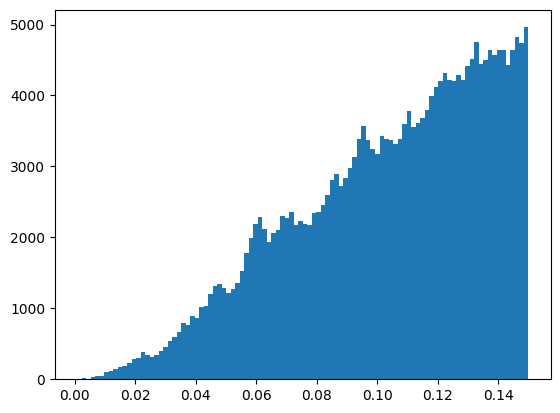

In [18]:
_=plt.hist(bgs_df[::20]["z"], 100)

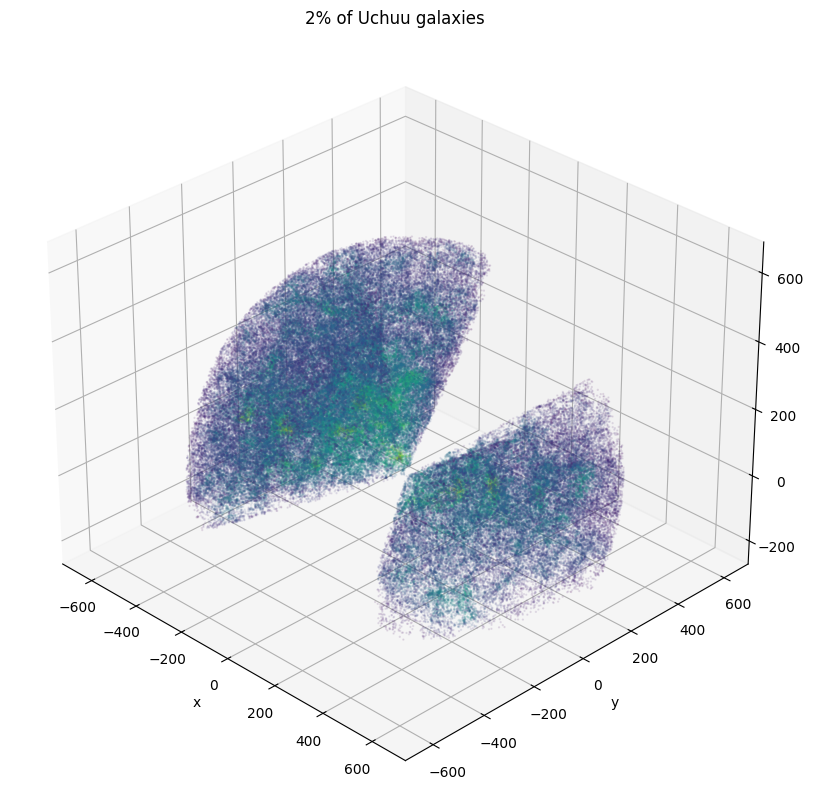

In [15]:
%matplotlib inline

from astropy.cosmology import Planck18 as cosmo
dist = cosmo.comoving_distance(bgs_df[::20]['z'])
x = np.cos(np.pi/180*bgs_df[::20]['ra'])*np.cos(np.pi/180*bgs_df[::20]['dec'])*dist
y = np.sin(np.pi/180*bgs_df[::20]['ra'])*np.cos(np.pi/180*bgs_df[::20]['dec'])*dist
z = np.sin(np.pi/180*bgs_df[::20]['dec'])*dist

scatter_3d(x,y,z)
plt.gca().set_xlabel('x')
plt.gca().set_ylabel('y')
plt.gca().set_zlabel('z')

plt.title('2% of Uchuu galaxies')
plt.savefig('../figures/Uchuu.png')

In [19]:
survey = extract_ztf()
survey.date_range

(58288.17, 59211.227)

In [ ]:
with open("outdir/SN_Uchuu_modelcov.pkl", 'rb') as f:
    lc = pickle.load(f)
    data = pickle.load(f)
    res_sn = pickle.load(f)
    meta = pickle.load(f)

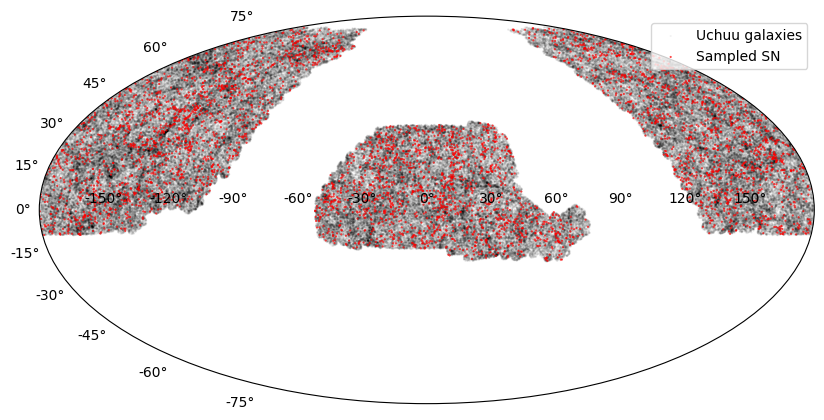

In [50]:
fig, ax = plt.subplots(figsize=(10,6), subplot_kw=dict(projection="mollweide"))
scatter_mollweide(bgs_df[::20], ax=ax, color='k', alpha=0.05, label='Uchuu galaxies')
scatter_mollweide(data, ax=ax, color='r', alpha=0.8, label='Sampled SN')
plt.legend(loc='upper right')
plt.savefig("../figures/SN_ra_dec_sampling.png")

In [24]:
ztf_sn = pandas.read_csv('data/data_ztf.csv', index_col=0)

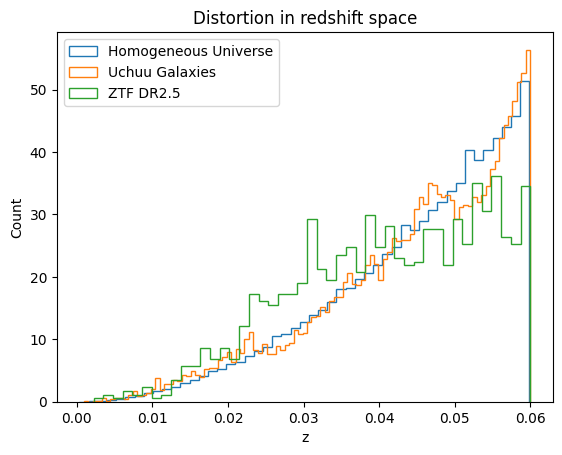

In [28]:
%matplotlib inline
snia.data['redshift'].plot.hist(bins=49, histtype='step', density=True, label='Homogeneous Universe')
_=plt.hist(bgs_df[::20][bgs_df[::20]["z"] < 0.06]["z"], 100, histtype='step', density=True, label='Uchuu Galaxies')
ztf_sn[ztf_sn['z'] < 0.06]['z'].plot.hist(bins=45, histtype='step', label='ZTF DR2.5', density=True)
plt.legend()
plt.xlabel('z')
plt.ylabel('Count')
plt.title('Distortion in redshift space')
plt.savefig('../figures/Redshift_distortion.png')

In [52]:
from skysurvey import DataSet
dset = DataSet(lc)
dset.set_survey(extract_ztf())
dset.set_targets(SNeIa_full_bgs.from_data(data))

good : 18
bad : 57, 61, 

In [ ]:
data[~data['good']]

redshift     x1      c            t0          ra        dec         z  \
0      0.03785  0.075  0.142  58580.843750  133.799591  -6.417918  0.054767   
1      0.04365  1.900 -0.125  58556.726562  331.433960  -2.915077  0.034687   
2      0.04165 -0.830 -0.049  58934.914062  126.465820  62.430984  0.030926   
3      0.05435  0.335  0.003  58496.625000    6.379686   4.064192  0.044632   
7      0.02525 -2.245  0.029  58864.164062   29.092600  22.754143  0.043380   
...        ...    ...    ...           ...         ...        ...       ...   
4469   0.04295 -1.740  0.021  59178.023438  111.270996  35.305225  0.056142   
4473   0.04825 -0.250  0.001  58707.734375  120.182594  27.187437  0.053648   
4474   0.05735 -0.200  0.019  58864.035156  344.586823  -9.342566  0.034298   
4475   0.03885  0.470 -0.013  58870.554688  316.925201   8.173893  0.048444   
4476   0.05795  1.040 -0.049  58497.902344   45.573349 -10.278409  0.059584   

         magabs     mwebv     magobs        x0 template   keep   good  \
0    -18.715847  0.035361  18.296761  0.000762    salt2   True  False   
1    -19.899353  0.134404  16.090210  0.005815    salt2  False  False   
2    -19.263029  0.058505  16.471380  0.004093    salt2   True  False   
3    -19.436409  0.023541  17.116173  0.002260    salt2   True  False   
7    -18.867392  0.106255  17.621420  0.001419    salt2  False  False   
...         ...       ...        ...       ...      ...    ...    ...   
4469 -19.026354  0.060661  18.042208  0.000963    salt2   True  False   
4473 -19.377937  0.046819  17.588112  0.001464    salt2  False  False   
4474 -19.344986  0.042836  16.619434  0.003572    salt2   True  False   
4475 -19.353199  0.103856  17.383238  0.001767    salt2   True  False   
4476 -19.528021  0.069899  17.675013  0.001351    salt2  False  False   

      converged  used_edris  
0         False       False  
1         False       False  
2         False       False  
3         False       False  
7         False       False  
...         ...         ...  
4469      False       False  
4473      False       False  
4474      False       False  
4475      False       False  
4476      False       False  

[2046 rows x 16 columns]

In [89]:
dset_sanitize_and_filter(dset)

  0%|          | 0/4419 [00:00<?, ?it/s]

Index([   0,    3,    4,    5,    6,    9,   10,   12,   13,   14,
       ...
       4457, 4460, 4462, 4463, 4464, 4466, 4468, 4470, 4471, 4477],
      dtype='int64', length=2451)

In [109]:
i = 0

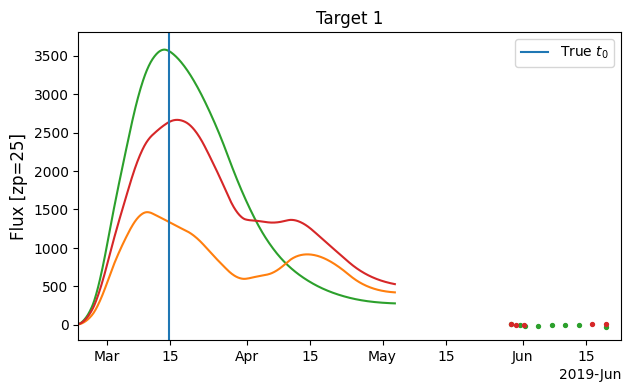

In [110]:
plot_lc(dset, dset.targets.data[~dset.targets.data['keep']].index[i])
i += 1

# Uchuu thingies

### Fit cosmo sur les points tirés

In [ ]:
snia_default = skysurvey.SNeIa()
_ = snia_default.draw(tstart=survey.date_range[0], tstop=survey.date_range[1], inplace=True,  zmax=0.06)
# _ = snia_default.draw(size=10000, inplace=True,  zmax=0.06)

<Axes: xlabel='z', ylabel='magobs'>

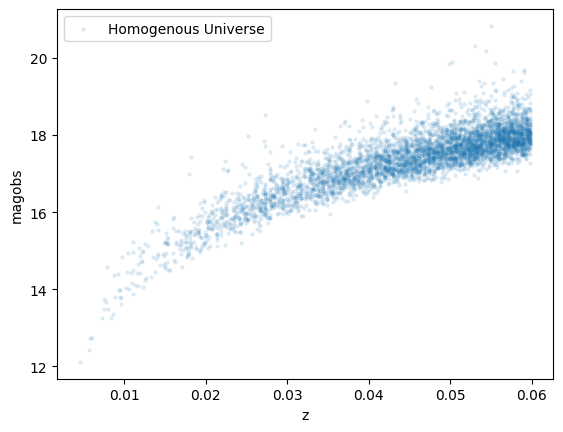

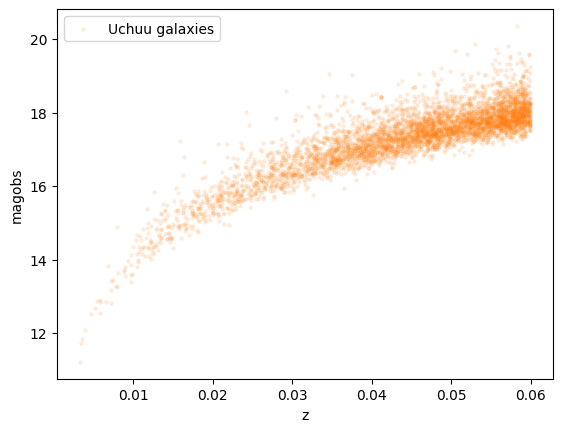

In [335]:
snia_default.data.plot.scatter('z','magobs', marker='.', alpha=0.1, color='tab:blue', label='Homogenous Universe')
# plt.savefig("../figures/homogeneous_magobs_z.png")
snia.data.plot.scatter('z','magobs', marker='.', alpha=0.1, color='tab:orange', label='Uchuu galaxies')
# plt.savefig("../figures/Uchuu_magobs_z.png")

In [336]:
from astropy.constants import c
from scipy.integrate import quad
from astropy.cosmology import Planck18 as cosmo
cosmo.Ogamma0 + cosmo.Onu0, cosmo.Om0, cosmo.Ode0, cosmo.H0.value

(0.0014936944554559178, 0.30966, 0.6888463055445441, 67.66)

In [337]:
def dist(z, Omega_r, Omega_m, Omega_l, H0):
    Omega_k = 1. - Omega_m - Omega_l - Omega_r
    return quad(lambda z1 : (Omega_m*(1+z1)**3 + Omega_r*(1+z1)**4 + Omega_k*(1+z1)**2 + Omega_l)**(-0.5)*c.value*10**(-3)/H0, 0, z)

dist_vec = np.vectorize(dist)

def f(z, Omega_m, Omega_r=cosmo.Ogamma0 + cosmo.Onu0, H0=cosmo.H0.value, Omega_l=cosmo.Ode0):
    return 5.0 * np.log10(abs((z + 1.0) * dist_vec(z, Omega_r, Omega_m, Omega_l, H0)[0])) + 25

In [338]:
from scipy.optimize import curve_fit

popt_uchuu, pcov_uchuu = curve_fit(f,
                       np.array(snia.data['z']),
                       np.array(snia.data['magobs'] - snia.data['magabs'].mean()),
                       p0=[cosmo.Om0],
                       bounds=([0.2],[0.4])
                      )

In [339]:
print("O_m = {}".format(*popt_uchuu))

O_m = 0.30586665084164766


In [340]:
popt_def, pcov_def = curve_fit(f,
                       np.array(snia_default.data['z']),
                       np.array(snia_default.data['magobs'] - snia_default.data['magabs'].mean()),
                       p0=[cosmo.Om0],
                       bounds=([0.2],[0.4])
                      )

In [341]:
print("\nO_m = {}".format(*popt_def))


O_m = 0.34324779430022223


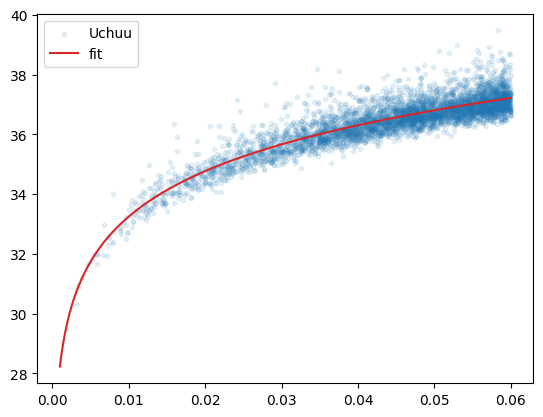

In [343]:
plt.scatter(snia.data['z'],np.array(snia.data['magobs'] - snia.data['magabs'].mean()), marker='.', alpha=0.1, color='tab:blue', label='Uchuu')

plt.plot(np.linspace(1e-3,0.06,1000), f(np.linspace(1e-3,0.06,1000),*popt_uchuu), label="fit", color='tab:red')
plt.legend()

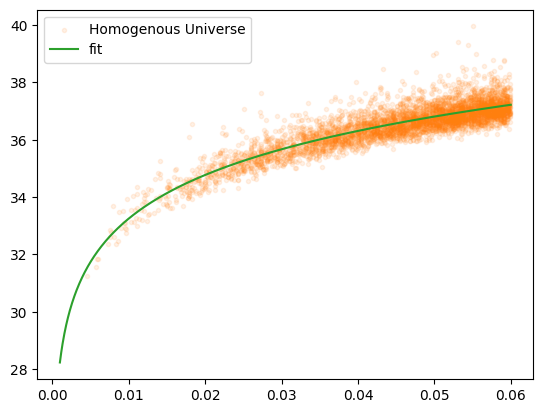

In [344]:
plt.scatter(snia_default.data['z'], snia_default.data['magobs'] - snia_default.data['magabs'].mean(), marker='.', alpha=0.1, color='tab:orange', label='Homogenous Universe')
plt.plot(np.linspace(1e-3,0.06,1000), f(np.linspace(1e-3,0.06,1000),*popt_def), label="fit", color='tab:green')
plt.legend()

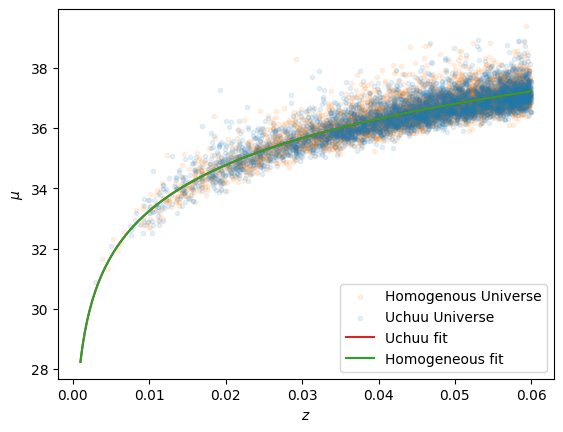

In [30]:
plt.scatter(snia_default.data['z'],np.array(snia_default.data['magobs'] - snia_default.data['magabs'].mean()), marker='.', alpha=0.1, color='tab:orange', label='Homogenous Universe')
plt.scatter(snia.data['z'],np.array(snia.data['magobs'] - snia.data['magabs'].mean()), marker='.', alpha=0.1, color='tab:blue', label='Uchuu Universe')

plt.plot(np.linspace(1e-3,0.06,1000), f(np.linspace(1e-3,0.06,1000),*popt_uchuu), color='tab:red', label="Uchuu fit")
plt.plot(np.linspace(1e-3,0.06,1000), f(np.linspace(1e-3,0.06,1000),*popt_def), color='tab:green', label="Homogeneous fit")
plt.ylabel("$\mu$")
plt.xlabel("$z$")

plt.legend()
# plt.savefig('../figures/Homogenous_vs_uchuu_mag.png')

### LC

In [5]:
survey = extract_ztf()

snia = SNeIa_full_bgs()
_ = snia.draw(tstart=survey.date_range[0], tstop=survey.date_range[1], inplace=True,  zmax=0.06)

In [12]:
dset = skysurvey.DataSet.from_targets_and_survey(snia, survey)

/global/homes/a/agillesl/.local/perlmutter/python-3.11/lib/python3.11/site-packages/ztffields/projection.py:157: UserWarning: cannot use dask_geopandas with MultiIndex fields dataframe
  warnings.warn("cannot use dask_geopandas with MultiIndex fields dataframe")
100%|██████████| 7512/7512 [00:36<00:00, 203.42it/s]


In [14]:
index = dset_sanitize_and_filter(dset)

  0%|          | 0/4432 [00:00<?, ?it/s]

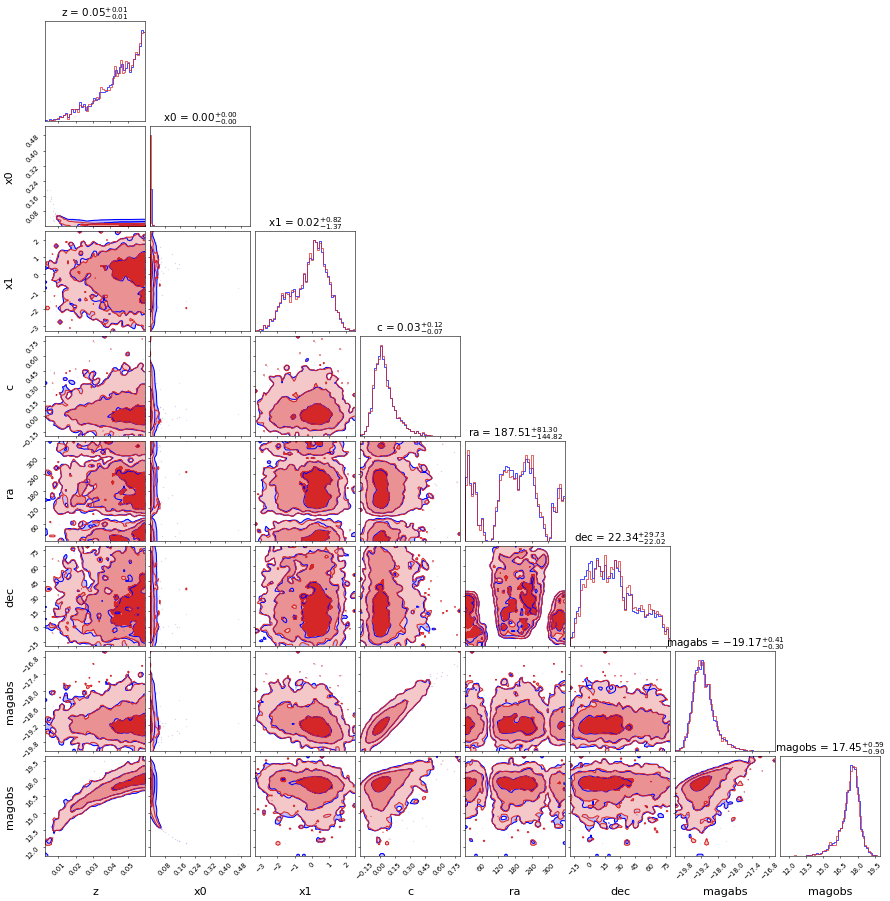

In [20]:
%matplotlib inline
fig = corner_(dset.targets.data,
    var_names=["z", "x0", "x1", "c", "ra", "dec", "magabs", "magobs"],
    labels=[
        r"$z$",
        r"$x_0$",
        r"$x_1$",
        r"$c$",
        r"RA",
        r"DEC",
        r"$M_{ABS}$",
        r"$M_{OBS}$",
    ])
_=corner_(dset.targets.data[dset.targets.data["keep"]],
    var_names=["z", "x0", "x1", "c", "ra", "dec", "magabs", "magobs"],
    fig = fig,
    color='tab:red')


Text(0.5, 1.0, 'Rate corrected')

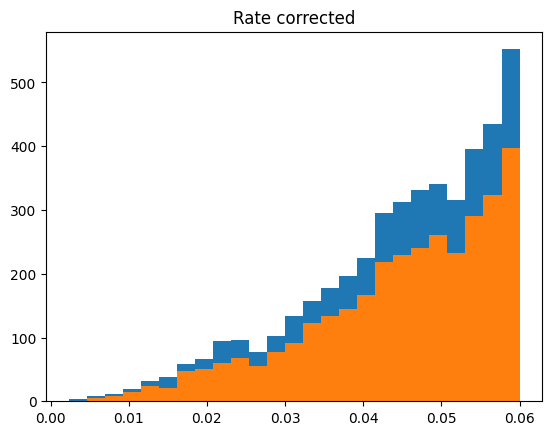

In [21]:
%matplotlib inline
_, bins,_ =plt.hist(dset.targets.data["z"], bins =25)
_ = plt.hist(dset.targets.data[dset.targets.data["keep"]]["z"], bins=bins)
plt.title('Rate corrected')

### PETS

In [125]:
lc = pandas.read_csv('data/PETS/Results/mock_lc.csv',usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13], index_col=0)

In [127]:
lc["valid"] = lc["valid"]==1

name       time       flux    fluxerr magsys  exptime  valid    lc  \
sn                                                                         
0        0  58534.336 -59.133658  89.336738     AB      NaN   True     0   
0        0  58538.230 -26.367389  35.894630     AB      NaN   True     0   
0        0  58538.273 -15.758058  21.509460     AB      NaN   True     1   
0        0  58543.234 -21.620533  24.696203     AB      NaN   True     0   
0        0  58543.273  -4.162594  29.938544     AB      NaN   True     1   
...    ...        ...        ...        ...    ...      ...    ...   ...   
4477  4477  59130.348  16.412379  17.061995     AB      NaN   True  8429   
4477  4477  59135.375 -22.388845  13.722394     AB      NaN   True  8429   
4477  4477  59140.350   4.703675  15.567878     AB      NaN   True  8429   
4477  4477  59146.290  25.417355  17.940313     AB      NaN   True  8429   
4477  4477  59147.270 -71.453152  44.119422     AB      NaN   True  8429   

      band  mag_sky  seeing         zp  
sn                                      
0     ztfr      NaN     NaN  26.100468  
0     ztfr      NaN     NaN  23.430183  
0     ztfg      NaN     NaN  25.225752  
0     ztfr      NaN     NaN  26.008379  
0     ztfg      NaN     NaN  25.279243  
...    ...      ...     ...        ...  
4477  ztfi      NaN     NaN  25.738365  
4477  ztfi      NaN     NaN  25.712536  
4477  ztfi      NaN     NaN  25.700333  
4477  ztfi      NaN     NaN  24.850475  
4477  ztfi      NaN     NaN  25.258705  

[335820 rows x 12 columns]

In [129]:
data

redshift     x1      c            t0          ra        dec         z  \
0      0.03785  0.075  0.142  58580.843750  133.799591  -6.417918  0.054767   
1      0.04365  1.900 -0.125  58556.726562  331.433960  -2.915077  0.034687   
2      0.04165 -0.830 -0.049  58934.914062  126.465820  62.430984  0.030926   
3      0.05435  0.335  0.003  58496.625000    6.379686   4.064192  0.044632   
4      0.02845  0.480 -0.068  59145.472656  175.504211  46.979774  0.035373   
...        ...    ...    ...           ...         ...        ...       ...   
4473   0.04825 -0.250  0.001  58707.734375  120.182594  27.187437  0.053648   
4474   0.05735 -0.200  0.019  58864.035156  344.586823  -9.342566  0.034298   
4475   0.03885  0.470 -0.013  58870.554688  316.925201   8.173893  0.048444   
4476   0.05795  1.040 -0.049  58497.902344   45.573349 -10.278409  0.059584   
4477   0.05525  0.960 -0.064  59169.683594   39.565613  23.993774  0.021145   

         magabs     mwebv     magobs        x0 template   keep   good  \
0    -18.715847  0.035361  18.296761  0.000762    salt2   True  False   
1    -19.899353  0.134404  16.090210  0.005815    salt2  False  False   
2    -19.263029  0.058505  16.471380  0.004093    salt2   True  False   
3    -19.436409  0.023541  17.116173  0.002260    salt2   True  False   
4    -19.636545  0.027598  16.396648  0.004385    salt2   True   True   
...         ...       ...        ...       ...      ...    ...    ...   
4473 -19.377937  0.046819  17.588112  0.001464    salt2  False  False   
4474 -19.344986  0.042836  16.619434  0.003572    salt2   True  False   
4475 -19.353199  0.103856  17.383238  0.001767    salt2   True  False   
4476 -19.528021  0.069899  17.675013  0.001351    salt2  False  False   
4477 -19.591244  0.134893  15.301932  0.012019    salt2   True   True   

      converged  used_edris  calc_z_cosmo     id_host  true_z_cosmo  
0         False       False           NaN  34472545.0           NaN  
1         False       False           NaN  62876368.0           NaN  
2         False       False           NaN   7438056.0           NaN  
3         False       False           NaN  58971053.0           NaN  
4          True        True      0.034934  65382278.0      0.034739  
...         ...         ...           ...         ...           ...  
4473      False       False           NaN  47271366.0           NaN  
4474      False       False           NaN  61452449.0           NaN  
4475      False       False           NaN  34462898.0           NaN  
4476      False       False           NaN  63083763.0           NaN  
4477       True        True      0.021528   3822857.0      0.021962  

[4478 rows x 19 columns]

In [130]:
sne = pandas.read_csv('data/PETS/Results/mock_sne.csv')
sne['valid'] = sne['valid']==1

In [133]:
sne[sne['valid']].index

Index([   0,    2,    3,    4,    5,    6,    9,   10,   11,   12,
       ...
       4462, 4463, 4464, 4466, 4468, 4470, 4471, 4472, 4474, 4477],
      dtype='int64', length=2878)

In [172]:
sne = sne.rename({"zhel":"z"}, axis=1)

In [201]:
sne[sne["valid"]]

name         z      zcmb          ra        dec     mwebv  \
0        0  0.054767  0.055791  133.799590  -6.417918  0.024733   
2        2  0.030926  0.031219  126.465820  62.430984  0.050094   
3        3  0.044632  0.043463    6.379686   4.064192  0.015904   
4        4  0.035373  0.036093  175.504210  46.979774  0.020301   
5        5  0.039411  0.040411  159.718290  27.958454  0.017776   
...    ...       ...       ...         ...        ...       ...   
4470  4470  0.042334  0.042995  156.271820  49.767250  0.008883   
4471  4471  0.057009  0.057943  131.237900  11.327976  0.028942   
4472  4472  0.059815  0.060588  218.115880   3.702180  0.023244   
4474  4474  0.034298  0.033116  344.586820  -9.342567  0.031498   
4477  4477  0.021145  0.020390   39.565613  23.993774  0.135282   

     classification    sn  comments          tmax        x0        x1  \
0              SNIa     0       NaN  58581.185385  0.000824  0.375347   
2              SNIa     2       NaN  58934.789112  0.004996 -0.743237   
3              SNIa     3       NaN  58496.674156  0.002454  0.197495   
4              SNIa     4       NaN  59145.574681  0.004759  0.439221   
5              SNIa     5       NaN  58937.620360  0.001470 -1.644872   
...             ...   ...       ...           ...       ...       ...   
4470           SNIa  4470       NaN  58514.191890  0.002800  0.887592   
4471           SNIa  4471       NaN  58533.942402  0.001666  1.375007   
4472           SNIa  4472       NaN  58479.149120  0.000774  0.167829   
4474           SNIa  4474       NaN  58864.920794  0.003947  0.901469   
4477           SNIa  4477       NaN  59169.715205  0.019998  0.933707   

             c survey  valid template  converged  
0     0.111048    ZTF   True    salt2       True  
2    -0.100424    ZTF   True    salt2       True  
3    -0.025473    ZTF   True    salt2       True  
4    -0.093295    ZTF   True    salt2       True  
5     0.109021    ZTF   True    salt2       True  
...        ...    ...    ...      ...        ...  
4470 -0.033507    ZTF   True    salt2       True  
4471 -0.063253    ZTF   True    salt2       True  
4472  0.164860    ZTF   True    salt2       True  
4474  0.027127    ZTF   True    salt2       True  
4477 -0.192612    ZTF   True    salt2       True  

[2878 rows x 17 columns]

In [176]:
dset = skysurvey.DataSet(lc[lc['valid']].rename({"mjd":"time"}, axis=1))
dset.set_survey(extract_ztf())
dset.set_targets(SNeIa_full_bgs.from_data(sne))

05:33 INFO    : Loading ZTF survey
INFO:src.logging:Loading ZTF survey
05:33 INFO    : Found file ../../project/Projet-LPNHE/data/Uchuu.csv with columns Index(['r_mag_app', 'r_mag_abs', 'dec', 'ra', 'z_cosmo', 'z', 'v_peak',
       'v_rms', 'in_desi'],
      dtype='object')
INFO:src.logging:Found file ../../project/Projet-LPNHE/data/Uchuu.csv with columns Index(['r_mag_app', 'r_mag_abs', 'dec', 'ra', 'z_cosmo', 'z', 'v_peak',
       'v_rms', 'in_desi'],
      dtype='object')


In [180]:
index = np.where(sne['valid'])[0]
index

array([   0,    2,    3, ..., 4472, 4474, 4477])

In [202]:
sne_ = dset.targets.data.loc[index].copy()

fixed = {"z": sne_["z"],
        "t0": sne_["tmax"],
        }

guess = {
    "c": sne_["c"],
    "x0": sne_["x0"],
    "x1": sne_["x1"],
}
bounds = {
    "c": sne_["c"].apply(lambda x: [-0.8, 1.0]),
    "x0": sne_["x0"].apply(lambda x: [-0.8, 0.8]),
    "x1": sne_["x1"].apply(lambda x: [-6, 6]),
}

params = dict(phase_fitrange=[-40, 130], maxcall=10000)

In [183]:
results, meta = dset.fit_lightcurves(
    source=sncosmo.Model("salt2"),
    index=index,
    use_dask=False,
    fixedparams=fixed,
    guessparams=guess,
    bounds=bounds,
    **params,
)


  0%|          | 0/2878 [00:00<?, ?it/s]

In [184]:
results

value     error        cov_x0        cov_x1         cov_c  \
0    z   0.054767       NaN           NaN           NaN           NaN   
     x0  0.000752  0.000014  2.027849e-10 -1.002353e-06 -2.310939e-07   
     x1  0.372907  0.150525 -1.002353e-06  2.266246e-02  6.753248e-04   
     c   0.134907  0.023010 -2.310939e-07  6.753248e-04  5.295591e-04   
2    z   0.030926       NaN           NaN           NaN           NaN   
...           ...       ...           ...           ...           ...   
4474 c   0.055019  0.014254 -7.926190e-07  2.349709e-03  2.031981e-04   
4477 z   0.021145       NaN           NaN           NaN           NaN   
     x0  0.012042  0.000018  3.079715e-10 -9.681302e-08 -1.965197e-08   
     x1  0.959667  0.011983 -9.681302e-08  1.436002e-04  3.812242e-06   
     c  -0.064867  0.001352 -1.965197e-08  3.812242e-06  1.828836e-06   

            truth  
0    z   0.054767  
     x0  0.000824  
     x1  0.375347  
     c   0.111048  
2    z   0.030926  
...           ...  
4474 c   0.027127  
4477 z   0.021145  
     x0  0.019998  
     x1  0.933707  
     c  -0.192612  

[11512 rows x 6 columns]

In [186]:
success = [meta[(i,"success")] for i in index]

In [188]:
dset.targets.data["converged"]=False

In [189]:
for i in index:
    dset.targets.data.loc[i,'converged'] = meta[(i,"success")]

In [191]:
dset.targets.data

name         z      zcmb          ra        dec     mwebv  \
0        0  0.054767  0.055791  133.799590  -6.417918  0.024733   
1        1  0.034687  0.033522  331.433960  -2.915077  0.126161   
2        2  0.030926  0.031219  126.465820  62.430984  0.050094   
3        3  0.044632  0.043463    6.379686   4.064192  0.015904   
4        4  0.035373  0.036093  175.504210  46.979774  0.020301   
...    ...       ...       ...         ...        ...       ...   
4473  4473  0.053648  0.054312  120.182594  27.187437  0.032707   
4474  4474  0.034298  0.033116  344.586820  -9.342567  0.031498   
4475  4475  0.048444  0.047384  316.925200   8.173893  0.081604   
4476  4476  0.059584  0.058966   45.573350 -10.278409  0.053340   
4477  4477  0.021145  0.020390   39.565613  23.993774  0.135282   

     classification    sn  comments          tmax          x0          x1  \
0              SNIa     0       NaN  58581.185385    0.000824    0.375347   
1              SNIa     1       NaN    999.900000  999.900000  999.900000   
2              SNIa     2       NaN  58934.789112    0.004996   -0.743237   
3              SNIa     3       NaN  58496.674156    0.002454    0.197495   
4              SNIa     4       NaN  59145.574681    0.004759    0.439221   
...             ...   ...       ...           ...         ...         ...   
4473           SNIa  4473       NaN  58706.767941    0.001913   -1.027464   
4474           SNIa  4474       NaN  58864.920794    0.003947    0.901469   
4475           SNIa  4475       NaN  58869.765099    0.003230   -0.644225   
4476           SNIa  4476       NaN    999.900000  999.900000  999.900000   
4477           SNIa  4477       NaN  59169.715205    0.019998    0.933707   

               c survey  valid template  converged  
0       0.111048    ZTF   True    salt2       True  
1     999.900000    ZTF  False    salt2      False  
2      -0.100424    ZTF   True    salt2       True  
3      -0.025473    ZTF   True    salt2       True  
4      -0.093295    ZTF   True    salt2       True  
...          ...    ...    ...      ...        ...  
4473   -0.071495    ZTF  False    salt2      False  
4474    0.027127    ZTF   True    salt2       True  
4475   -0.336198    ZTF  False    salt2      False  
4476  999.900000    ZTF  False    salt2      False  
4477   -0.192612    ZTF   True    salt2       True  

[4478 rows x 17 columns]

In [192]:
with open("data/SN_Uchuu_pets.pkl", "wb") as f:
    pickle.dump(dset.data, f)
    pickle.dump(dset.targets.data, f)
    pickle.dump(results, f)
    pickle.dump(meta, f)


### Selection cut

In [12]:
np.sum(dset.targets.data['good'])

2743

/tmp/ipykernel_361613/2217368323.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot((bins[1:]+bins[:-1])/2, filtfilt([1/5]*5, 1, surv/full))


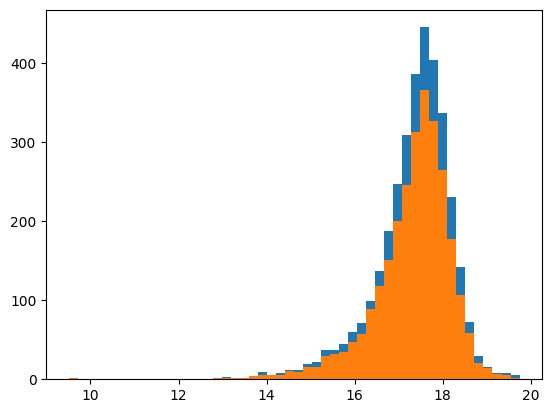

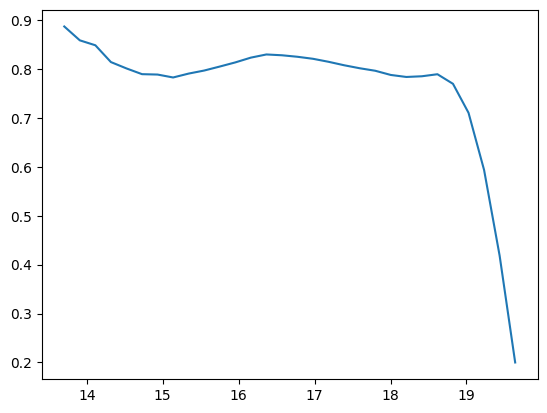

In [356]:
full, bins, _=plt.hist(dset.targets.data[dset.targets.data["keep"]]["magobs"], bins =50)
surv,_,_ = plt.hist(dset.targets.data[dset.targets.data["good"]]["magobs"], bins=bins)
plt.figure()
from scipy.signal import filtfilt
plt.plot((bins[1:]+bins[:-1])/2, filtfilt([1/5]*5, 1, surv/full))

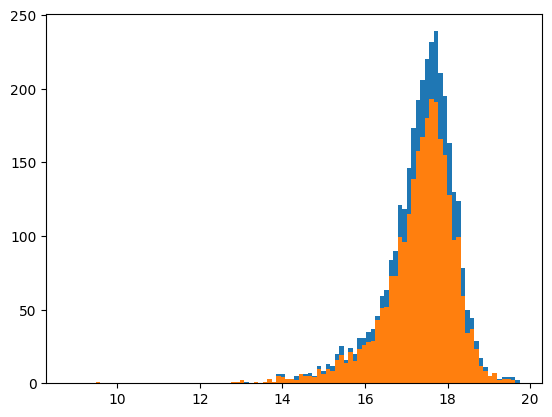

In [357]:
_,bins =np.histogram(dset.targets.data["magobs"], bins=100)
kept,_,_=plt.hist(dset.targets.data[dset.targets.data["keep"]]["magobs"], bins=bins)
good,_,_=plt.hist(dset.targets.data[dset.targets.data["good"]]["magobs"], bins=bins)

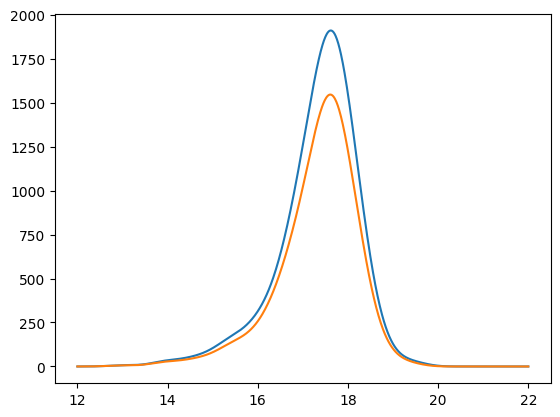

In [358]:
from scipy.stats import gaussian_kde
kept_kde = gaussian_kde(dset.targets.data[dset.targets.data["keep"]]["magobs"], bw_method=0.3)
good_kde = gaussian_kde(dset.targets.data[dset.targets.data["good"]]["magobs"], bw_method=0.3)

mag = np.linspace(12, 22, 1000)
plt.plot(mag, kept_kde(mag)*np.sum(dset.targets.data["keep"]))
plt.plot(mag, good_kde(mag)*np.sum(dset.targets.data["good"]))


In [359]:
mid = (bins[:-1] + bins[1:])/2
mid[kept > 0][[0,-1]]

array([ 9.532465, 19.689556], dtype=float32)

In [369]:
def sigmoid(x, alpha, beta, A=1):
    return A/(1 + np.exp(alpha*(x-beta)))

In [370]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, mag, good_kde(mag)*np.sum(dset.targets.data["good"])/(kept_kde(mag)*np.sum(dset.targets.data["keep"])), p0=[9.532465, 19.689556,1.])

In [371]:
popt

array([ 2.97668968, 19.96889684,  0.82943   ])

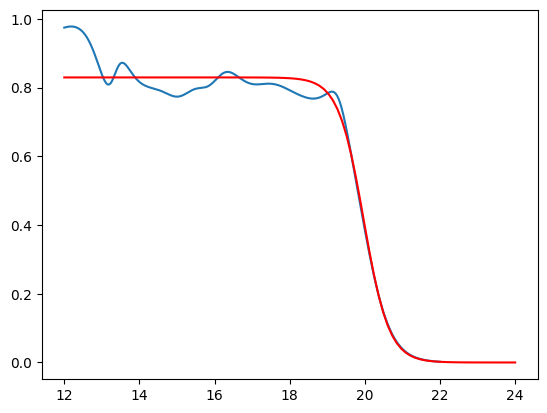

In [372]:
plt.plot(mag, good_kde(mag)*np.sum(dset.targets.data["good"])/(kept_kde(mag)*np.sum(dset.targets.data["keep"])))
plt.plot(np.linspace(12, 24, 100), sigmoid(np.linspace(12, 24, 100),*popt),'r')

### LC fit

In [ ]:
with open("outdir/SN_Uchuu_modelcov.pkl", 'rb') as f:
    lc = pickle.load(f)
    data = pickle.load(f)
    res_sn = pickle.load(f)
    meta = pickle.load(f)
dset = skysurvey.DataSet(lc)
dset.set_survey(extract_ztf())
dset.set_targets(SNeIa_full_bgs.from_data(data))

In [23]:
index = dset_sanitize_and_filter(dset)

100%|██████████| 4419/4419 [00:17<00:00, 245.57it/s]


In [ ]:
results, meta, models = fit_lc(dset,
                               index,
                               savefile='data/SN_Uchuu_modelcov.pkl',
                               modelcov=True)

In [85]:
success = [meta[(i,"success")] for i in index]

In [86]:
sum(success)

1938

In [87]:
dset.targets.data["converged"]=False

In [89]:
for i in index:
    dset.targets.data.loc[i,'converged'] = meta[(i,"success")]

In [68]:
with open("data/SN_Uchuu_modelcov.pkl", 'rb') as f:
    lc = pickle.load(f)
    data = pickle.load(f)
    res_sn = pickle.load(f)
    meta = pickle.load(f)
dset = skysurvey.DataSet(lc)
dset.set_survey(extract_ztf())
dset.set_targets(SNeIa_full_bgs.from_data(data))

In [164]:
index = data[data["converged"]].index

In [166]:
better_results=pandas.DataFrame(
    {
        **{col: np.array(res_sn["value"].loc[map(lambda x: (x, col), index)])
        for col in ["t0", "c", "x0", "x1"]},
        **{"err_"+col: np.array(res_sn["error"].loc[map(lambda x: (x, col), index)]) for col in ["t0", "c", "x0", "x1"]},
        **{"delta_"+col : np.array(res_sn["value"].loc[map(lambda x: (x, col), index)]) - np.array(res_sn["truth"].loc[map(lambda x: (x, col), index)])
        for col in ["t0", "c", "x0", "x1"]},
    }, index = index
)

In [167]:
res_sn = res_sn.loc[index]

In [24]:
from astropy.time import Time

def plot_lc(dset, i, better_results=None, fig=None, **kwargs):
    _ = dset.show_target_lightcurve(index=i, s=8, fig=fig, **kwargs)
    plt.ylim(-200)
    target = dset.targets.data.loc[i]
    plt.axvline(Time(target["t0"], format="mjd").datetime, label=r'True $t_0$')
    if better_results:
        plt.axvline(Time(better_results.loc[i]["t0"], format="mjd").datetime, linestyle='--', c='darkblue', alpha=0.4, label = r'Fitted $t_0$')

        plt.axvline(Time(better_results.loc[i]["t0"] + better_results.loc[i]["err_t0"] , format="mjd").datetime, c='k', linestyle='dotted', label = r'$\sigma_{t_0}$')
        plt.axvline(Time(better_results.loc[i]["t0"] - better_results.loc[i]["err_t0"] , format="mjd").datetime, c='k', linestyle='dotted')

    
    plt.xlim(Time(target["t0"]-50, format="mjd").datetime, Time(target["t0"] +100, format="mjd").datetime)
    plt.legend()
    plt.title(f"Target {i}")


In [171]:
goods = (better_results['err_c'] < jnp.sqrt(0.07)) & \
        (abs(better_results['c']) < 0.3) & \
        (abs(better_results['x1']) + better_results['x1'] < 5)

/tmp/ipykernel_1190110/3370857107.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _=corner_(better_results[data[data['good']]['converged'] & goods])
/global/homes/a/agillesl/.local/perlmutter/python-3.11/lib/python3.11/site-packages/numpy/core/_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/global/homes/a/agillesl/.local/perlmutter/python-3.11/lib/python3.11/site-packages/numpy/core/_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


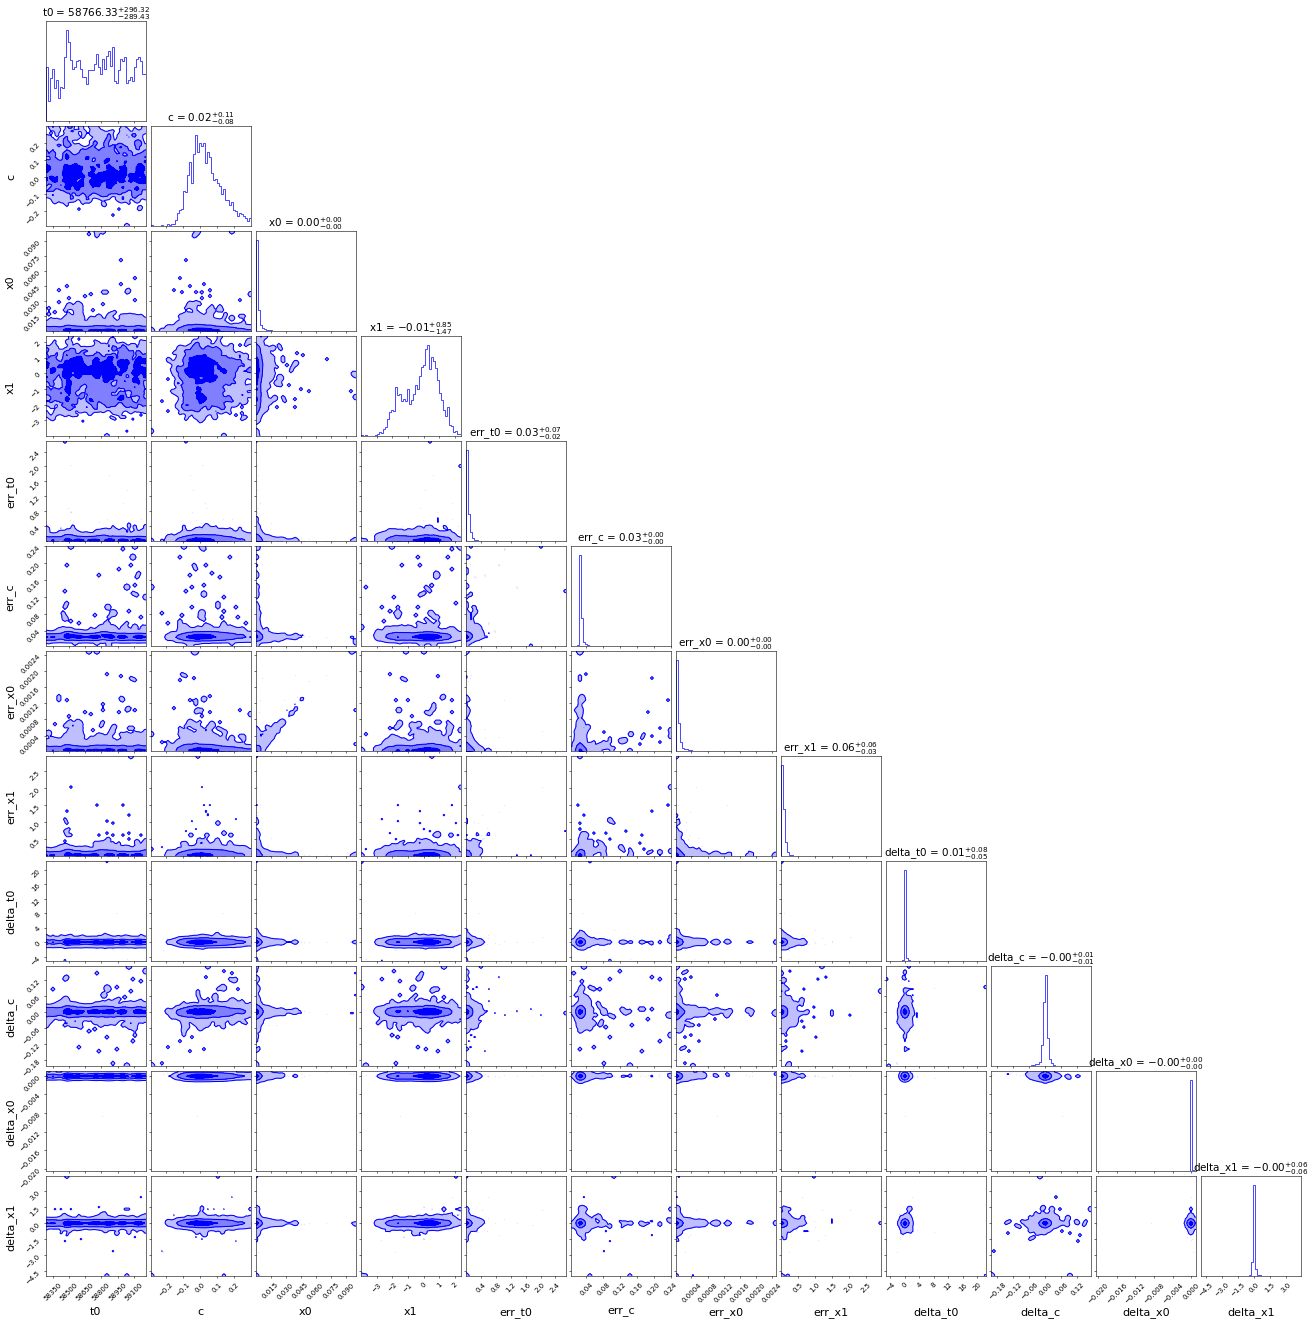

In [176]:
_=corner_(better_results[data[data['good']]['converged'] & goods])

In [136]:
def dset_from_res(better_results):
    data_r = data.join(better_results[['x1','c','t0','x0']], lsuffix = '_true').loc[index].copy()
    data_r = data_r[dset.targets.get_template_columns()].copy()
    dset_r = skysurvey.DataSet(data = lc.loc[index])
    dset_r.set_survey(extract_ztf())
    dset_r.set_targets(SNeIa_full_bgs.from_data(data_r))
    return dset_r

In [137]:
dset_r = dset_from_res(better_results)

In [47]:
with open("data/SN_Uchuu.pkl", 'rb') as f:
    lc_ = pickle.load(f)
    data_ = pickle.load(f)
    res_sn_ = pickle.load(f)

index = data_[data_["good"]].index[:800]
better_results_old=pandas.DataFrame(
    {
        **{col: np.array(res_sn_["value"].loc[map(lambda x: (x, col), index)])
        for col in ["t0", "c", "x0", "x1"]},
        **{"err_"+col: np.array(res_sn_["error"].loc[map(lambda x: (x, col), index)]) for col in ["t0", "c", "x0", "x1"]},
        **{"delta_"+col : np.array(res_sn_["value"].loc[map(lambda x: (x, col), index)]) - np.array(res_sn_["truth"].loc[map(lambda x: (x, col), index)])
        for col in ["t0", "c", "x0", "x1"]},
    }, index = index
)

dset_old_fit=dset_from_res(better_results_old)

In [138]:
def plot_lc_reconstruct(dset_r, index, fig=None,**kwargs):
    params = dict(colors=['red','green','yellow'], linestyle='dashed', linewidth=1,
                                time_range=[-20,50], npoints=500,
                                zp=25, zpsys="ab",
                                format_time=True, t0_format="mjd", 
                                in_mag=False, invert_mag=True, label='fit')
    params.update(kwargs)
    _=dset_r.targets.get_target_template(index).show_lightcurve(['ztfr', 'ztfg', 'ztfi'], params={},
                                ax=plt.gca(), **params
                                )
    plt.legend()

### Extended Salt2

In [15]:
from skysurvey import DataSet
with open("outdir/SN_Uchuu_modelcov.pkl", 'rb') as f:
    lc = pickle.load(f)
    data = pickle.load(f)


In [16]:
data

redshift     x1      c            t0          ra        dec         z  \
0      0.03785  0.075  0.142  58580.843750  133.799591  -6.417918  0.054767   
1      0.04365  1.900 -0.125  58556.726562  331.433960  -2.915077  0.034687   
2      0.04165 -0.830 -0.049  58934.914062  126.465820  62.430984  0.030926   
3      0.05435  0.335  0.003  58496.625000    6.379686   4.064192  0.044632   
4      0.02845  0.480 -0.068  59145.472656  175.504211  46.979774  0.035373   
...        ...    ...    ...           ...         ...        ...       ...   
4473   0.04825 -0.250  0.001  58707.734375  120.182594  27.187437  0.053648   
4474   0.05735 -0.200  0.019  58864.035156  344.586823  -9.342566  0.034298   
4475   0.03885  0.470 -0.013  58870.554688  316.925201   8.173893  0.048444   
4476   0.05795  1.040 -0.049  58497.902344   45.573349 -10.278409  0.059584   
4477   0.05525  0.960 -0.064  59169.683594   39.565613  23.993774  0.021145   

         magabs     mwebv     magobs        x0 template   keep   good  \
0    -18.715847  0.035361  18.296761  0.000762    salt2   True  False   
1    -19.899353  0.134404  16.090210  0.005815    salt2  False  False   
2    -19.263029  0.058505  16.471380  0.004093    salt2   True  False   
3    -19.436409  0.023541  17.116173  0.002260    salt2   True  False   
4    -19.636545  0.027598  16.396648  0.004385    salt2   True   True   
...         ...       ...        ...       ...      ...    ...    ...   
4473 -19.377937  0.046819  17.588112  0.001464    salt2  False  False   
4474 -19.344986  0.042836  16.619434  0.003572    salt2   True  False   
4475 -19.353199  0.103856  17.383238  0.001767    salt2   True  False   
4476 -19.528021  0.069899  17.675013  0.001351    salt2  False  False   
4477 -19.591244  0.134893  15.301932  0.012019    salt2   True   True   

      converged  used_edris  
0         False       False  
1         False       False  
2         False       False  
3         False       False  
4          True        True  
...         ...         ...  
4473      False       False  
4474      False       False  
4475      False       False  
4476      False       False  
4477       True        True  

[4478 rows x 16 columns]

In [18]:
snia=SNeIa_full_bgs.from_data(data)

In [44]:
data

redshift     x1      c            t0          ra        dec         z  \
0      0.03785  0.075  0.142  58580.843750  133.799591  -6.417918  0.054767   
1      0.04365  1.900 -0.125  58556.726562  331.433960  -2.915077  0.034687   
2      0.04165 -0.830 -0.049  58934.914062  126.465820  62.430984  0.030926   
3      0.05435  0.335  0.003  58496.625000    6.379686   4.064192  0.044632   
4      0.02845  0.480 -0.068  59145.472656  175.504211  46.979774  0.035373   
...        ...    ...    ...           ...         ...        ...       ...   
4473   0.04825 -0.250  0.001  58707.734375  120.182594  27.187437  0.053648   
4474   0.05735 -0.200  0.019  58864.035156  344.586823  -9.342566  0.034298   
4475   0.03885  0.470 -0.013  58870.554688  316.925201   8.173893  0.048444   
4476   0.05795  1.040 -0.049  58497.902344   45.573349 -10.278409  0.059584   
4477   0.05525  0.960 -0.064  59169.683594   39.565613  23.993774  0.021145   

         magabs     mwebv     magobs        x0 template   keep   good  \
0    -18.715847  0.035361  18.296761  0.000762    salt2   True  False   
1    -19.899353  0.134404  16.090210  0.005815    salt2  False  False   
2    -19.263029  0.058505  16.471380  0.004093    salt2   True  False   
3    -19.436409  0.023541  17.116173  0.002260    salt2   True  False   
4    -19.636545  0.027598  16.396648  0.004385    salt2   True   True   
...         ...       ...        ...       ...      ...    ...    ...   
4473 -19.377937  0.046819  17.588112  0.001464    salt2  False  False   
4474 -19.344986  0.042836  16.619434  0.003572    salt2   True  False   
4475 -19.353199  0.103856  17.383238  0.001767    salt2   True  False   
4476 -19.528021  0.069899  17.675013  0.001351    salt2  False  False   
4477 -19.591244  0.134893  15.301932  0.012019    salt2   True   True   

      converged  used_edris     id_host   z_cosmo  
0         False       False  34472545.0  0.055663  
1         False       False  62876368.0  0.035583  
2         False       False   7438056.0  0.030041  
3         False       False  58971053.0  0.043264  
4          True        True  65382278.0  0.034739  
...         ...         ...         ...       ...  
4473      False       False  47271366.0  0.052032  
4474      False       False  61452449.0   0.03236  
4475      False       False  34462898.0  0.051862  
4476      False       False  63083763.0  0.059915  
4477       True        True   3822857.0  0.021962  

[4478 rows x 18 columns]

In [48]:
data['magobs'] = skysurvey.Transient.magabs_to_magobs(snia, z=data['z_cosmo'], magabs=data['magabs'])

In [52]:
data['x0'] = skysurvey.Transient.magobs_to_amplitude(snia, magobs=data['magobs'], param_name="x0")

In [53]:
data

redshift     x1      c            t0          ra        dec         z  \
0      0.03785  0.075  0.142  58580.843750  133.799591  -6.417918  0.054767   
1      0.04365  1.900 -0.125  58556.726562  331.433960  -2.915077  0.034687   
2      0.04165 -0.830 -0.049  58934.914062  126.465820  62.430984  0.030926   
3      0.05435  0.335  0.003  58496.625000    6.379686   4.064192  0.044632   
4      0.02845  0.480 -0.068  59145.472656  175.504211  46.979774  0.035373   
...        ...    ...    ...           ...         ...        ...       ...   
4473   0.04825 -0.250  0.001  58707.734375  120.182594  27.187437  0.053648   
4474   0.05735 -0.200  0.019  58864.035156  344.586823  -9.342566  0.034298   
4475   0.03885  0.470 -0.013  58870.554688  316.925201   8.173893  0.048444   
4476   0.05795  1.040 -0.049  58497.902344   45.573349 -10.278409  0.059584   
4477   0.05525  0.960 -0.064  59169.683594   39.565613  23.993774  0.021145   

         magabs     mwebv     magobs        x0 template   keep   good  \
0    -18.715847  0.035361  18.333368  0.000741    salt2   True  False   
1    -19.899353  0.134404  16.146991  0.005554    salt2  False  False   
2    -19.263029  0.058505  16.406917  0.004372    salt2   True  False   
3    -19.436409  0.023541  17.046431  0.002426    salt2   True  False   
4    -19.636545  0.027598  16.356313  0.004580    salt2   True   True   
...         ...       ...        ...       ...      ...    ...    ...   
4473 -19.377937  0.046819  17.519203  0.001569    salt2  False  False   
4474 -19.344986  0.042836  16.490098  0.004049    salt2   True  False   
4475 -19.353199  0.103856  17.536576  0.001545    salt2   True  False   
4476 -19.528021  0.069899  17.687530  0.001344    salt2  False  False   
4477 -19.591244  0.134893  15.385546  0.011200    salt2   True   True   

      converged  used_edris     id_host   z_cosmo  
0         False       False  34472545.0  0.055663  
1         False       False  62876368.0  0.035583  
2         False       False   7438056.0  0.030041  
3         False       False  58971053.0  0.043264  
4          True        True  65382278.0  0.034739  
...         ...         ...         ...       ...  
4473      False       False  47271366.0  0.052032  
4474      False       False  61452449.0   0.03236  
4475      False       False  34462898.0  0.051862  
4476      False       False  63083763.0  0.059915  
4477       True        True   3822857.0  0.021962  

[4478 rows x 18 columns]

In [54]:
dset = skysurvey.DataSet.from_targets_and_survey(SNeIa_full_bgs.from_data(data), extract_ztf())

/global/homes/a/agillesl/.local/perlmutter/python-3.11/lib/python3.11/site-packages/ztffields/projection.py:157: UserWarning: cannot use dask_geopandas with MultiIndex fields dataframe
  warnings.warn("cannot use dask_geopandas with MultiIndex fields dataframe")


  0%|          | 0/7454 [00:00<?, ?it/s]

/global/homes/a/agillesl/.local/perlmutter/python-3.11/lib/python3.11/site-packages/skysurvey/dataset.py:154: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  data = pandas.concat(lightcurves, keys=fieldids # store fieldid


In [55]:
index = dset_sanitize_and_filter(dset)

  0%|          | 0/4419 [00:00<?, ?it/s]

In [ ]:
with open("outdir/SN_Uchuu_modelcov.pkl", 'wb') as f:
    pickle.dump(data, f)

In [56]:
import numpy as np
import pickle
from edris.tools import linear_interpolation_matrix, restrict
from edris.models import likelihood, binned_cosmo, sn1a_model
from edris.minimize import tncg
import sncosmo
from scipy.interpolate import interp1d
from astropy.constants import c
from scipy.integrate import quad
from astropy.cosmology import Planck18 as cosmo
from scipy.optimize import curve_fit

try:
    from tqdm.auto import tqdm
except:
    tqdm = lambda x: x

In [57]:
idx = index[13]
idx

18

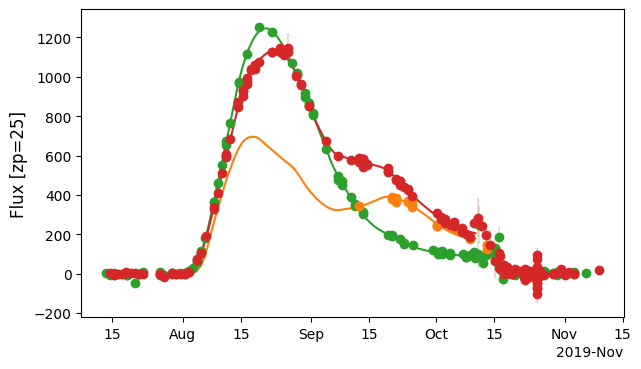

In [58]:
_=dset.show_target_lightcurve(index=idx, phase_window=[-40,80])

In [ ]:
fixed = {
    "z": dset.targets.data.loc[idx, "z"],
    "mwebv": dset.targets.data.loc[idx, "mwebv"],
    "mwr_v": [3.1],
}

guess = {
    "t0": dset.targets.data.loc[idx, "t0"],
    "c": dset.targets.data.loc[idx, "c"],
    "x0": dset.targets.data.loc[idx, "x0"],
    "x1": dset.targets.data.loc[idx, "x1"],
}
bounds = {
    "t0": [dset.targets.data.loc[idx, "t0"] + np.array([-15, 30])],
    "c": [[-3, 3]],
    "x0": [[-.1, 10]],
    "x1": [[-5, 5]],
}

params = dict(phase_fitrange=[-40, 80], maxcall=10000, modelcov=True)
dset.fit_lightcurves(
    source=dset.targets._template._sncosmo_model,
    index=[idx],
    use_dask=False,
    fixedparams=fixed,
    guessparams=guess,
    bounds=bounds,
    **params,
)

In [64]:
fixed = {
    "z": dset.targets.data.loc[index, "z"],
    "mwebv": dset.targets.data.loc[index, "mwebv"],
    "mwr_v": [3.1]*len(index),
}

guess = {
    "t0": dset.targets.data.loc[index, "t0"],
    "c": dset.targets.data.loc[index, "c"],
    "x0": dset.targets.data.loc[index, "x0"],
    "x1": dset.targets.data.loc[index, "x1"],
}
bounds = {
    "t0": dset.targets.data.loc[index, "t0"].apply(lambda x: np.array([-15, 30]) + x),
    "c": [[-3, 3]]*len(index),
    "x0": [[-.1, 10]]*len(index),
    "x1": [[-5, 5]]*len(index),
}

params = dict(phase_fitrange=[-40, 80], maxcall=10000, modelcov=True)
results, meta = dset.fit_lightcurves(
    source=dset.targets._template._sncosmo_model,
    index=index,
    use_dask=False,
    fixedparams=fixed,
    guessparams=guess,
    bounds=bounds,
    **params,
)

  0%|          | 0/2437 [00:00<?, ?it/s]

In [82]:
index = data[data['good']].index

In [83]:
dset.targets.data["converged"]=False

In [84]:
for i in index:
    dset.targets.data.loc[i,'converged'] = meta[(i,"success")]

In [93]:
with open("outdir/SN_Uchuu_modelcov.pkl", 'wb') as f:
    pickle.dump(dset.data, f)
    pickle.dump(dset.targets.data, f)
    pickle.dump(results, f)
    pickle.dump(meta, f)

In [71]:
results, meta

(                   value     error    cov_t0        cov_x0    cov_x1  \
 0    z          0.054767       NaN       NaN           NaN       NaN   
      t0     58580.938285  0.242576  0.058846 -2.134920e-06  0.055716   
      x0         0.000751  0.000029 -0.000002  8.222353e-10 -0.000003   
      x1        -0.002002  0.286441  0.055716 -3.201360e-06  0.082139   
      c          0.117863  0.038001  0.000916 -8.497314e-07  0.001534   
 ...                  ...       ...       ...           ...       ...   
 4477 t0     59169.680365  0.084739  0.007181  2.343907e-06 -0.001108   
      x0         0.011189  0.000332  0.000002  1.103889e-07  0.000002   
      x1         0.965946  0.049727 -0.001108  1.939766e-06  0.002473   
      c         -0.064738  0.027717 -0.000261 -7.944728e-06 -0.000296   
      mwebv      0.134893       NaN       NaN           NaN       NaN   
 
                    cov_c         truth  
 0    z               NaN      0.054767  
      t0     9.159298e-04   58580.8437

### Except it's Abacus

In [5]:
snia = SNeIa_full_bgs(filename='Abacus.csv')

In [8]:
survey = extract_ztf()

_ = snia.draw(tstart=survey.date_range[0], tstop=survey.date_range[1], inplace=True,  zmax=0.06)

dset = skysurvey.DataSet.from_targets_and_survey(snia, survey)

/global/homes/a/agillesl/.local/perlmutter/python-3.11/lib/python3.11/site-packages/ztffields/projection.py:157: UserWarning: cannot use dask_geopandas with MultiIndex fields dataframe
  warnings.warn("cannot use dask_geopandas with MultiIndex fields dataframe")


  0%|          | 0/7338 [00:00<?, ?it/s]

/global/homes/a/agillesl/.local/perlmutter/python-3.11/lib/python3.11/site-packages/skysurvey/dataset.py:154: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  data = pandas.concat(lightcurves, keys=fieldids # store fieldid


In [16]:
index = dset_sanitize_and_filter(dset)

  0%|          | 0/4435 [00:00<?, ?it/s]

In [24]:
def plot_lc(dset, i, better_results=None, **kwargs):
    params=dict(phase_window=[-40, 80])
    params.update(kwargs)
    _ = dset.show_target_lightcurve(index=i, s=8, **params)
    plt.ylim(-200)
    target = dset.targets.data.loc[i]
    plt.axvline(Time(target["t0"], format="mjd").datetime, label=r"$t_0$")
    if better_results:
        plt.axvline(
            Time(better_results.loc[i]["t0"], format="mjd").datetime,
            linestyle="--",
            c="darkblue",
            alpha=0.4,
            label=r"Fitted $t_0$",
        )

        plt.axvline(
            Time(
                better_results.loc[i]["t0"] + better_results.loc[i]["err_t0"],
                format="mjd",
            ).datetime,
            c="k",
            linestyle="dotted",
            label=r"$\sigma_{t_0}$",
        )
        plt.axvline(
            Time(
                better_results.loc[i]["t0"] - better_results.loc[i]["err_t0"],
                format="mjd",
            ).datetime,
            c="k",
            linestyle="dotted",
        )

    plt.legend()
    plt.title(f"Target {i}")


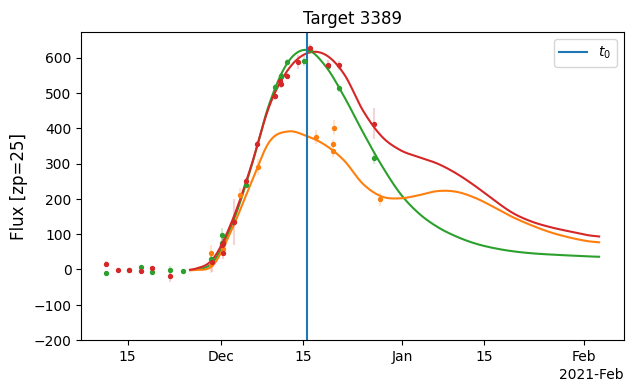

In [47]:
plot_lc(dset, index[1812])

In [48]:
def fit_lc(dset, index, savefile=None, **kwargs):
    """
    Fit lightcurves using the SALT2 model with skysurvey/sncosmo using the following bounds:
    * ``z`` is fixed
    * ``t0`` is fitted in ``[t0_true-15 ; t0_true+30]``
    * ``c`` is fitted in ``[-3;3]``
    * ``x0`` is fitted in ``[-0.1;10]``
    * ``x1`` is fitted in ``[-5;5]``

    Parameters
    ----------
    dset : skysurvey.DataSet
        Dataset containing the targets and lightcurves.
    index : np.ndarray or list
        Indexes of the targets to fit.
    savefile : str, optional
        File to pickle the lightcurves, targets and results to.
        Default ``None`` means not saving.
    **kwargs : Any
        All kwargs are passed to ``dset.fit_lightcurves``.

    Return
    ------
    results : pandas.Dataframe
        Converged points and covariance matrices as a dataframe
    meta : dict list
        Metadata of the fits, the key ``success`` flags fits that converged
    """

    logger.log(logging.INFO, f"Running LC fit")
    fixed = {
        "z": dset.targets.data.loc[index, "z"],
        "mwebv": dset.targets.data.loc[index, "mwebv"],
        "mwr_v": [3.1]*len(index),
    }

    guess = {
        "t0": dset.targets.data.loc[index, "t0"],
        "c": dset.targets.data.loc[index, "c"],
        "x0": dset.targets.data.loc[index, "x0"],
        "x1": dset.targets.data.loc[index, "x1"],
    }
    bounds = {
        "t0": dset.targets.data.loc[index, "t0"].apply(lambda x : [x-15, x+30]),
        "c": [[-3, 3]]*len(index),
        "x0": [[-.1, 10]]*len(index),
        "x1": [[-5, 5]]*len(index),
    }

    params = dict(phase_fitrange=[-40, 80], maxcall=10000, modelcov=True)
    params.update(kwargs)

    results, meta = dset.fit_lightcurves(
        source=dset.targets._template._sncosmo_model,
        index=index,
        use_dask=False,
        fixedparams=fixed,
        guessparams=guess,
        bounds=bounds,
        **params,
    )
    dset.targets.data['converged'] = False

    for i in index:
        dset.targets.data.loc[i,'converged'] = meta[(i,"success")]

    if savefile:
        logger.log(logging.INFO, "Saving")
        with open(savefile, "wb") as f:
            pickle.dump(dset.data, f)
            pickle.dump(dset.targets.data, f)
            pickle.dump(results, f)
            pickle.dump(meta, f)
            logger.log(logging.INFO, "Done")
    return results, meta



In [ ]:
fit_lc(dset, index, savefile="outdir/SN_Abacus.pkl")

  0%|          | 0/2420 [00:00<?, ?it/s]

# ZTF position in Uchuu

In [3]:
bgs_df = load_bgs(columns=['RA', 'DEC', 'Z', 'Z_COSMO', 'STATUS', 'V_PEAK', 'V_RMS','R_MAG_ABS','R_MAG_APP'])

Found file ../../project/Projet-LPNHE/data/Uchuu.csv with columns Index(['r_mag_app', 'r_mag_abs', 'dec', 'ra', 'z_cosmo', 'z', 'v_peak',
       'v_rms', 'in_desi'],
      dtype='object')


In [ ]:
ztf_sn = pandas.read_csv('data/data_ztf.csv', index_col=0)
ztf_sn

In [44]:
snia = SNeIa_full_bgs()
data = snia.draw(size=5000, inplace=True,  zmax=0.06)


In [ ]:
_=corner_(ztf_sn[ztf_sn['valid']==1],
        var_names=['ra','dec','z','tmax', 'x0', 'x1', 'c'])

In [45]:
%matplotlib inline

In [46]:
survey = extract_ztf()

ztf_sn = ztf_sn[ztf_sn['tmax'].between(survey.date_range[0], survey.date_range[1])].copy()
ztf_sn
nside = 128

In [48]:
ids = healpy.ang2pix(theta = np.pi/2 - ztf_sn['dec']*np.pi/180, phi=ztf_sn['ra']*np.pi/180, nside=nside)
map_ = np.zeros(healpy.nside2npix(nside))
for i in tqdm(ids):
    map_[i] += 1
map_ = healpy.smoothing(map_, fwhm=0.1)
map_ -= map_.min()
id_bgs = healpy.ang2pix(theta = np.pi/2 - bgs_df['dec']*np.pi/180, phi=bgs_df['ra']*np.pi/180, nside=nside)
mask = np.zeros(healpy.nside2npix(nside), dtype=bool)
for i in tqdm(id_bgs):
    mask[i] = True
#map_[~mask]=0
map_ /= np.sum(map_)

z_nside = 64
id_bgs = healpy.ang2pix(theta = np.pi/2 - bgs_df['dec']*np.pi/180, phi=bgs_df['ra']*np.pi/180, nside=z_nside)
bgs_pix = [[]]*healpy.nside2npix(z_nside)
for i,nb_pix in tqdm(enumerate(id_bgs), total = len(id_bgs)):
    bgs_pix[nb_pix] = bgs_pix[nb_pix] + [id_bgs.index[i]]

bgs_pix = [np.array(bgs_df.loc[ids]['z']) for ids in bgs_pix]

  0%|          | 0/3170 [00:00<?, ?it/s]

  0%|          | 0/4698044 [00:00<?, ?it/s]

  0%|          | 0/4698044 [00:00<?, ?it/s]

In [ ]:
healpy.mollview(map_)

In [ ]:
spl = np.random.choice(np.arange(healpy.nside2npix(nside)), size=100000, p=map_)
map_sampled = np.zeros(healpy.nside2npix(nside))
for i in tqdm(spl):
    map_sampled[i] += 1
map_sampled = healpy.smoothing(map_sampled, fwhm=0.02)

healpy.mollview(map_sampled)

In [51]:
healpy.ang2pix(z_nside, *healpy.pix2ang(nside, spl))

array([19180,  6003, 16408, ...,   468, 23826,  7955])

In [52]:
np.where([len(l)>0 for l in bgs_pix])[0]

array([  385,   386,   389, ..., 32684, 32685, 32937])

In [53]:
def rand_ztf_positions(maps, size=1, zcut=0.1):
    ztf_map, bgs_redshifts = maps
    ztf_nside = healpy.npix2nside(len(ztf_map))
    bgs_nside = healpy.npix2nside(len(bgs_nside))
    
    sampled_pix = np.random.choice(np.arange(healpy.nside2npix(nside)), size=size, p=ztf_map)
    
    bgs_sampled_pix = healpy.ang2pix(bgs_nside, *healpy.pix2ang(ztf_nside, spl))
    
    for angpix, zpix in zip(sampled_pix,bgs_sampled_pix):
        new_ra, new_dec = draw_from_pixel(angpix, ztf_nside)
        ra.append(new_ra)
        dec.append(new_dec)

        kde = gaussian_kde(bgs_redshifts[zpix])
        z.append(kde.resample(1)[0][0])

    return(ra, dec, z)

def draw_from_pixel(pix, nside):
    boundaries_theta,boundaries_ra = healpy.vec2ang(healpy.boundaries(nside, pix).T)
    boundaries_dec = np.pi/2 - boundaries_theta
    boundaries_ra = boundaries_ra[(boundaries_dec != -np.pi/2) & (boundaries_dec != np.pi/2)]

    min_, max_ = np.min(boundaries_ra), np.max(boundaries_ra)
    if max_-min_>= 2*np.pi-np.pi/nside:
        boundaries_ra[boundaries_ra < np.pi]+= 2*np.pi
    min_, max_ = np.min(boundaries_ra),np.max(boundaries_ra)

    in_pix = False
    while not in_pix:
        draw_ra = np.random.uniform(min_, max_)
        draw_ra -= 2*np.pi*(draw_ra > 2*np.pi)
        draw_dec = np.arcsin(np.random.uniform(np.min(np.sin(boundaries_dec)), np.max(np.sin(boundaries_dec))))
        in_pix = (pix == healpy.ang2pix(nside, 0.5 * np.pi - draw_dec, draw_ra))
    
    return np.array([draw_ra, draw_dec])


In [54]:
with open("data/bgs_redshifts_map.pkl", "wb") as fp:
    pickle.dump(bgs_pix, fp)

55


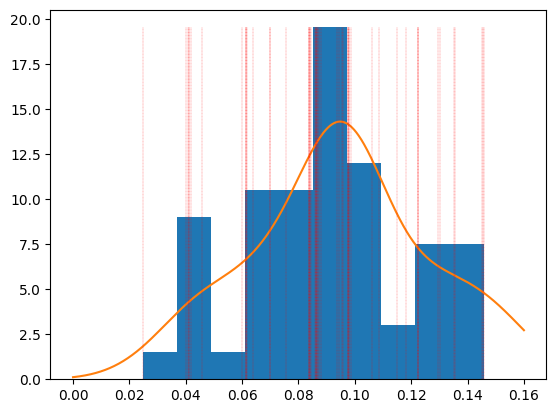

In [72]:
from scipy.stats import gaussian_kde
pix = 32684
print(len(bgs_pix[pix]))
if len(bgs_pix[pix]) > 0:
    h,_,_=plt.hist(bgs_pix[pix], density=True)
    kde = gaussian_kde(bgs_pix[pix])
    _=plt.plot(np.linspace(0, 0.16, 1000), kde.pdf(np.linspace(0, 0.15, 1000)))
    _=plt.vlines(bgs_pix[pix], 0,np.max(h), color='r', linestyle='--', linewidth=0.2)

In [ ]:
map_bgs = np.zeros(healpy.nside2npix(64))
for i in tqdm(id_bgs):
    map_bgs[i] += 1
map_bgs = healpy.smoothing(map_bgs, fwhm=0.1)
healpy.mollview(map_bgs)

In [ ]:
start = time.time()
dset = skysurvey.DataSet.from_targets_and_survey(snia, survey)
stop = time.time()
time.strftime('%H:%M:%S', time.gmtime(stop - start))

In [ ]:
det = dset.get_ndetection(detlimit=7) > 10
detected = det[det].index
len(detected)

In [ ]:
def detection_av_ap(dset, detected):
    n_det = []
    dset.data["detected"] = (dset.data["flux"]/dset.data["fluxerr"]) > 5
    for i in tqdm(detected):
        target = dset.targets.data.loc[i]
        obs_data = dset.data[dset.data["detected"]].loc[i]
        n_det.append((np.sum(obs_data["time"].between(target["t0"] - 50, target["t0"])), np.sum(obs_data["time"].between(target["t0"], target["t0"]+200))))
    return detected[~np.any(np.array(n_det) < 3, axis=1)]
        
id_det = detection_av_ap(dset, detected)

In [ ]:
def fit_lc(dset, id_det):
    fixed = {"z": dset.targets.data.loc[id_det]["z"]}

    guess = {
        "t0": dset.targets.data.loc[id_det]["t0"],
        "c": dset.targets.data.loc[id_det]["c"],
        "x0": dset.targets.data.loc[id_det]["x0"],
        "x1": dset.targets.data.loc[id_det]["x1"],
    }
    bounds = {
        "t0": dset.targets.data.loc[id_det]["t0"].apply(lambda x: [x-5, x+5]),
        "c": dset.targets.data.loc[id_det]["c"].apply(lambda x: [-0.3, 1.0]),
        "x0": dset.targets.data.loc[id_det]["x0"].apply(lambda x: [-0.1, 0.1]),
        "x1": dset.targets.data.loc[id_det]["x1"].apply(lambda x: [-4, 4]),
    }

    results, meta = dset.fit_lightcurves(
        source=sncosmo.Model("salt2"),
        index=id_det,
        use_dask=False,
        fixedparams=fixed,
        guessparams=guess,
        bounds=bounds,
    )

    better_results = pandas.DataFrame(
        {
            **{col: np.array(results["value"].loc[map(lambda x: (x, col), id_det[:400])] - \
                          results["truth"].loc[map(lambda x: (x, col), id_det[:400])])
            for col in guess.keys()},
            **{"err_"+col: np.array(results["error"].loc[map(lambda x: (x, col), id_det[:400])]) for col in guess.keys()}
        }
    )
    return better_results

In [ ]:
results_ztf = fit_lc(dset, id_det[:400])

In [ ]:
fig=corner_(results_ztf,
    fig=plt.figure(figsize=(20,20)),
    var_names=list(guess.keys()),
    color='tab:blue')

In [ ]:
snia_bgs = SNeIa_full_bgs()

In [ ]:
snia_bgs.draw(tstart=survey.date_range[0], tstop=survey.date_range[1], zmax=0.06, inplace=True)
dset_bgs = skysurvey.DataSet.from_targets_and_survey(snia_bgs, survey)

In [ ]:
det = dset_bgs.get_ndetection(detlimit=7) > 10
detected_bgs = det[det].index
id_det_bgs = detection_av_ap(dset_bgs, detected_bgs)

In [ ]:
_=plt.hist(snia_bgs.data['redshift'], bins=50, histtype='step', density=True)
_=plt.hist(snia_bgs.data['z'], bins=50, histtype='step', density=True)
_=plt.hist(snia.data['z'], bins=50, histtype='step', density=True)

In [ ]:
fig =corner_(snia_bgs.data, ['ra','dec','z'], fig=plt.figure(figsize=(15,15)), color='tab:blue', bins=30)
_=corner_(snia.data, ['ra','dec','z'], fig=fig, color='tab:red', bins=30)


In [ ]:
fig =corner_(snia_bgs.data.loc[id_det_bgs], ['ra','dec','z'], fig=plt.figure(figsize=(15,15)), color='tab:blue', bins=30)
_=corner_(snia.data.loc[id_det], ['ra','dec','z'], fig=fig, color='tab:red', bins=30)


In [ ]:
results_bgs = fit_lc(dset_bgs, id_det_bgs[:400])

In [ ]:
fig=corner_(results_bgs,
    fig=plt.figure(figsize=(20,20)),
    var_names=list(guess.keys()),
    color='tab:red')

_=corner_(better_results,
    fig=fig,
    var_names=list(guess.keys()),
    color='tab:blue')


# EDRIS

### Run

In [163]:
with open("outdir/SN_Uchuu_modelcov.pkl", 'rb') as f:
    lc = pickle.load(f)
    data = pickle.load(f)
    res_sn = pickle.load(f)
    meta = pickle.load(f)

In [172]:
data[data["used_edris"]][data[data["used_edris"]]["z"] == data[data["used_edris"]]["z"].min()]

redshift     x1      c            t0        ra       dec         z  \
4389   0.02045  0.535  0.098  58502.339844  43.22393 -7.057206  0.001071   

        magabs     mwebv     magobs        x0 template  keep  good  converged  \
4389 -18.87846  0.058427  10.267057  1.249097    salt2  True  True       True   

      used_edris     id_host   z_cosmo  calc_z_cosmo  
4389        True  24244651.0  0.001521      0.001679

In [173]:
data.loc[4389,"converged"]=False

In [174]:
index = data[data['converged']].index

In [175]:
# %lprun -f sncosmo_to_edris
exp, cov, obs = sncosmo_to_edris(res_sn, data, index, n_bins=6)

/global/homes/a/agillesl/.local/perlmutter/python-3.11/lib/python3.11/site-packages/jax/_src/lax/lax.py:516: ComplexWarning: Casting complex values to real discards the imaginary part
  return _convert_element_type(operand, new_dtype, weak_type=False)
/global/homes/a/agillesl/.local/perlmutter/python-3.11/lib/python3.11/site-packages/jax/_src/lax/lax.py:516: ComplexWarning: Casting complex values to real discards the imaginary part
  return _convert_element_type(operand, new_dtype, weak_type=False)


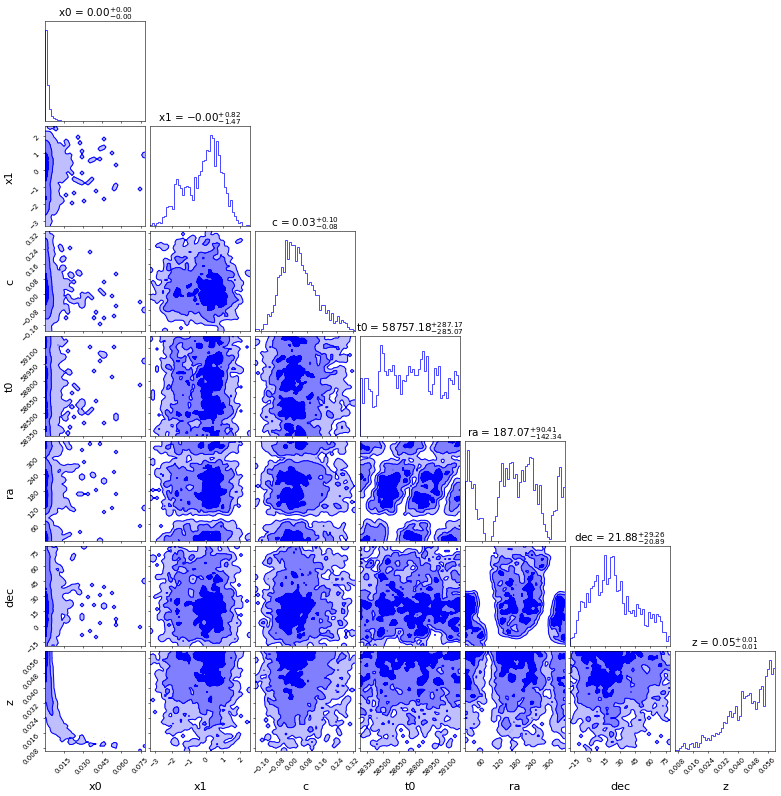

In [176]:
_=corner_(data[data['used_edris']], var_names=['x0','x1','c','t0','ra','dec','z'])


Text(0.5, 1.0, 'Redshift bins')

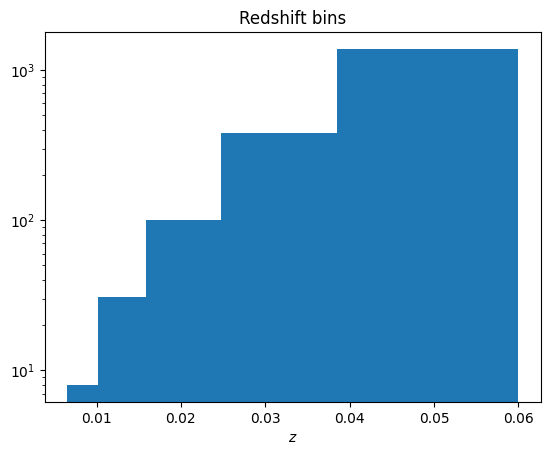

In [177]:
plt.hist(exp["z"], bins=exp["z_bins"], log=True)
plt.xlabel('$z$')
plt.title('Redshift bins')
# plt.savefig(f'../figures/edris_{n}sn_zdist.png')

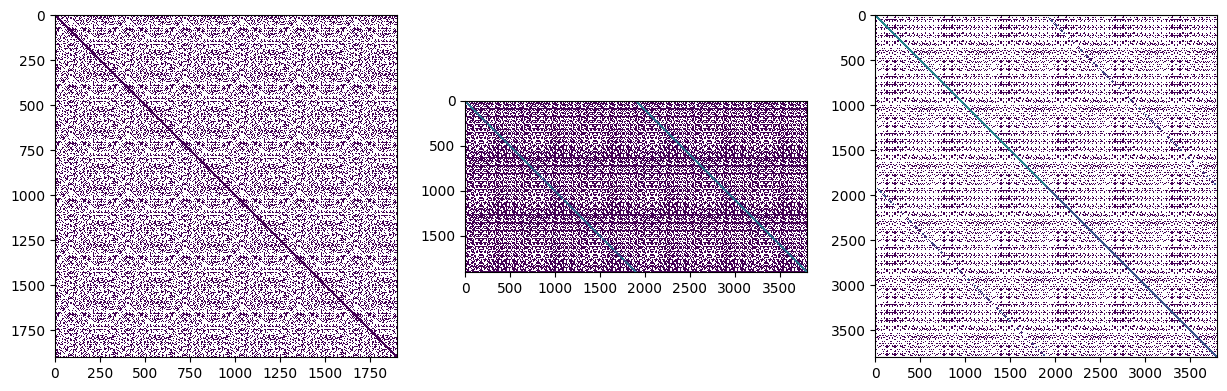

In [178]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
ax1.imshow(cov.C_mm, norm='log')
ax2.imshow(cov.C_mx, norm='log')
ax3.imshow(cov.C_xx, norm='log')


In [ ]:
cov_res =  get_cov_from_hess(hess)

sigma_inv = jnp.diag(1/jnp.sqrt(jnp.diag(cov_res)))
corr = jnp.matmul(sigma_inv,jnp.matmul(cov_res, sigma_inv))

In [ ]:
n_var = len(hess["coef"]["coef"])
n_bins = len(hess["mu_bins"]["mu_bins"])
n = hess["variables"]["variables"].shape[1]

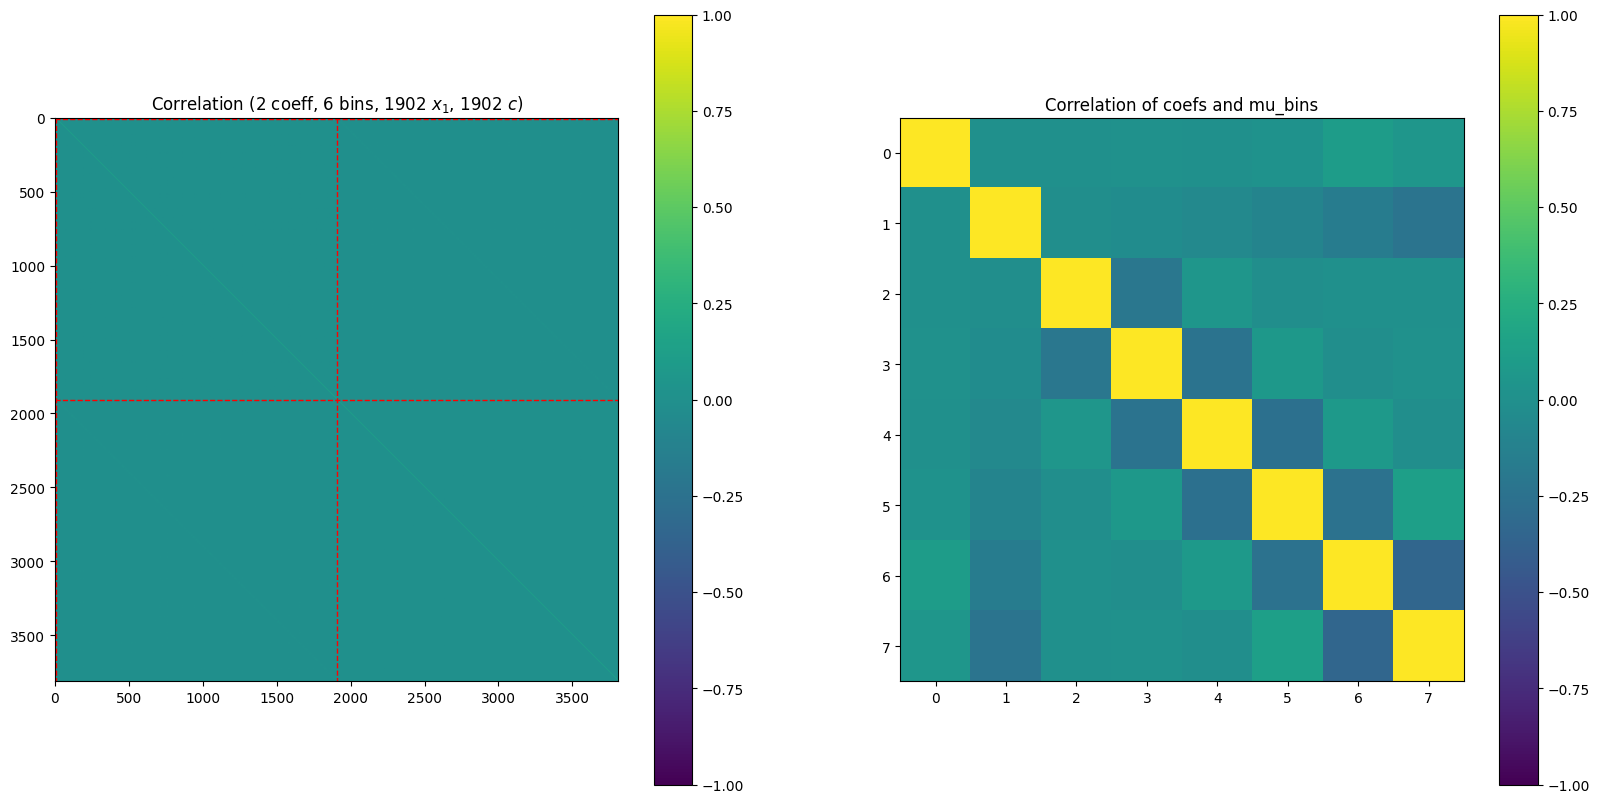

In [185]:
from matplotlib import colors
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
im1 = ax1.imshow(corr, norm = colors.Normalize(vmin=-1.0, vmax=1.0))
ax1.set_title(f'Correlation (2 coeff, {n_bins} bins, {n} $x_1$, {n} $c$)')
ax1.hlines([n_var+n_bins-.5, n+n_var+n_bins-.5], xmin=0, xmax=n_var*n+n_var+n_bins-.5, linestyle='--', linewidth=1, color='r')
ax1.vlines([n_var+n_bins-.5, n+n_var+n_bins-.5], ymin=0, ymax=n_var*n+n_var+n_bins-.5, linestyle='--', linewidth=1, color='r')
cb = ax2.figure.colorbar(im1, ax=ax1)

im2 = ax2.imshow(corr[:n_bins+2,:n_bins+2], norm = colors.Normalize(vmin=-1.0, vmax=1.0))
ax2.set_title('Correlation of coefs and mu_bins')
ax2.figure.colorbar(im2, ax=ax2)


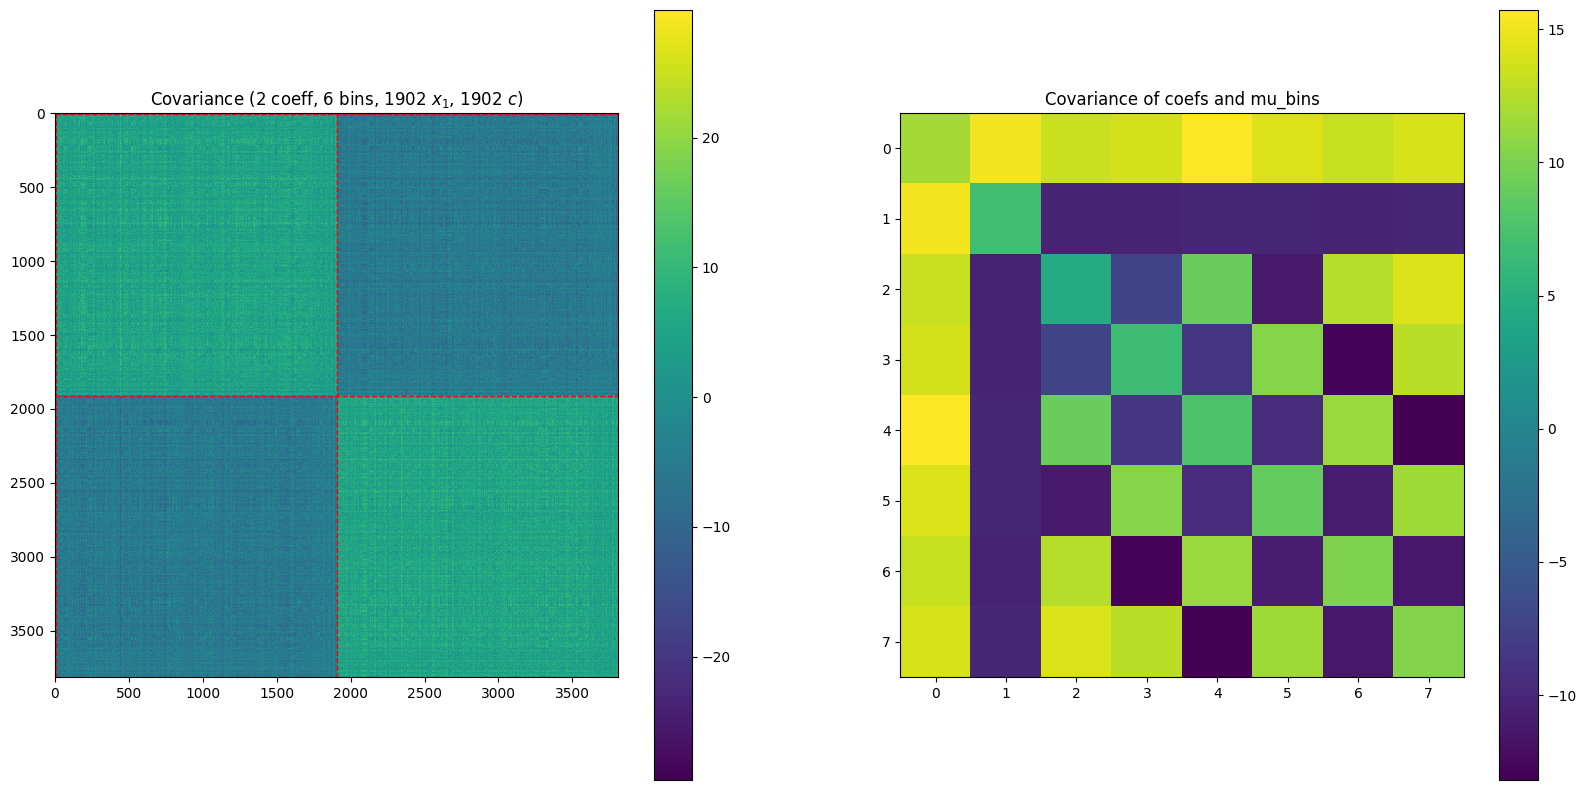

In [186]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
im1 = ax1.imshow(-jnp.sign(cov_res)*jnp.log(jnp.abs(cov_res)))
ax1.set_title(f'Covariance ({n_var} coeff, {n_bins} bins, {n} $x_1$, {n} $c$)')
ax1.hlines([n_var+n_bins-.5, n+n_var+n_bins-.5], xmin=0, xmax=n_var*n+n_var+n_bins-.5, linestyle='--', linewidth=1, color='r')
ax1.vlines([n_var+n_bins-.5, n+n_var+n_bins-.5], ymin=0, ymax=n_var*n+n_var+n_bins-.5, linestyle='--', linewidth=1, color='r')

im2 = ax2.imshow((-jnp.sign(cov_res)*jnp.log(jnp.abs(cov_res)))[:n_bins+2,:n_bins+2])
ax2.set_title('Covariance of coefs and mu_bins')

ax2.figure.colorbar(im1, ax=ax1)
ax2.figure.colorbar(im2, ax=ax2)
# plt.savefig(f'../figures/edris_pets_cov.png')

In [187]:
std_mag = obs.mag - jnp.matmul(res['coef'], res['variables'])

Text(0.5, 0, '$z$')

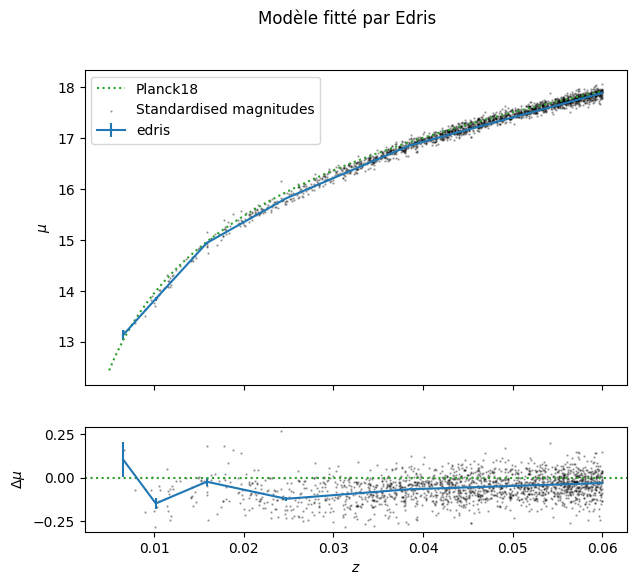

In [188]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex='col', figsize=(7,6), gridspec_kw={'height_ratios': [3,1]})

ax1.errorbar(exp['z_bins'], res['mu_bins'], yerr=jnp.sqrt(jnp.diag(cov_res[2:2+n_bins,2:2+n_bins])), color='tab:blue', label='edris')
ax1.plot(np.linspace(5e-3, 0.06,1000), mag_Planck18(np.linspace(5e-3, 0.06,1000)), color='tab:green', linestyle=':', label='Planck18')

ax1.scatter(exp["z"], std_mag, s=.5, alpha=.3, color='k', label='Standardised magnitudes')
ax1.legend()
ax1.set_ylabel(r'$\mu$')
fig.suptitle(r"Modèle fitté par Edris")

ax2.errorbar(exp['z_bins'], res['mu_bins']-mag_Planck18(exp["z_bins"]), yerr=jnp.sqrt(jnp.diag(cov_res[2:2+n_bins,2:2+n_bins])), color='tab:blue')
ax2.scatter(exp["z"], std_mag - mag_Planck18(exp["z"]), color='k', s=.5, alpha=.3)
lims = ax2.get_xlim()
ax2.hlines(0., xmin=lims[0], xmax=lims[1], color='tab:green', linestyle=':')
ax2.set_xlim(*lims)
ax2.set_ylabel(r'$\Delta\mu$')
ax2.set_xlabel(r'$z$')


In [189]:
with open("outdir/SN_Uchuu_edris_res.pkl", 'wb') as f:
    pickle.dump(exp, f)
    pickle.dump(obs, f)
    pickle.dump(cov, f)
    pickle.dump(res, f)
    pickle.dump(cov_res, f)
    pickle.dump(iter_params, f)

In [190]:
with open("outdir/SN_Uchuu_modelcov.pkl", 'wb') as f:
    pickle.dump(lc, f)
    pickle.dump(data, f)
    pickle.dump(res_sn, f)
    pickle.dump(meta, f)

In [121]:
better_results=pandas.DataFrame(
    {
        **{col: np.array(res_sn["value"].loc[map(lambda x: (x, col), index)])
        for col in ["t0", "c", "x0", "x1"]},
        **{"err_"+col: np.array(res_sn["error"].loc[map(lambda x: (x, col), index)]) for col in ["t0", "c", "x0", "x1"]},
        **{"delta_"+col : np.array(res_sn["value"].loc[map(lambda x: (x, col), index)]) - np.array(res_sn["truth"].loc[map(lambda x: (x, col), index)])
        for col in ["t0", "c", "x0", "x1"]},
    }, index = index
)


#### Smooth cosmo

In [818]:
from edris.tools import linear_interpolation
def integrand(Omega_m, Omega_r, Omega_l, u):
    return 1/jnp.sqrt(Omega_m + Omega_r*u**(-2) + Omega_l*u**6)

def dist(z, Omega_m=Planck18.Om0, Omega_r=5e-5, Omega_l=Planck18.Ode0, H0=Planck18.H0.value, nstep=10000, **kwargs):
    dh = c.value*1e-3/H0
    u = 1 / jnp.sqrt(1 + z)
    umin = 0.02
    step = (1 - umin) / nstep
    _u = jnp.arange(umin + 0.5 * step, 1, step)
    csum = jnp.cumsum(integrand(Omega_m, Omega_r, Omega_l, _u[-1::-1]))[-1::-1]
    R = linear_interpolation(u, csum, _u - 0.5 * step)\
        * 2 * step * dh
    return R

In [819]:
def cosmo(params, exp):
    return 5.0 * jnp.log10(abs(exp["z"] + 1.0) * dist(exp["z"], **params)) + 25 - 19.3

In [823]:
x0 = {
    "Omega_m": jnp.array([Planck18.Om0]),
    # "Omega_r": jnp.array([5e-5]),
    "Omega_l": jnp.array([Planck18.Ode0]),
    "H0": jnp.array([Planck18.H0.value]),
    "coef": jnp.array([-0.14, 3.15]),
    "variables": jnp.array(obs.variables.reshape((2, -1))),
}


In [824]:
x0

{'Omega_m': Array([0.30966], dtype=float64),
 'Omega_l': Array([0.68884631], dtype=float64),
 'H0': Array([67.66], dtype=float64),
 'coef': Array([-0.14,  3.15], dtype=float64),
 'variables': Array([[-0.00200228,  0.27863792,  0.44728055, ...,  1.01350592,
          1.1097324 ,  0.96594646],
        [ 0.11786323,  0.009692  , -0.05756255, ..., -0.0274476 ,
         -0.04555106, -0.06473815]], dtype=float64)}

In [825]:
L = lambda x: restrict(
    likelihood,
    {
        "sigma_int": 0.1,
    },
)(x, exp, cov, obs, cosmo=cosmo, truncated=False, restricted=False)
params = dict(niter=1000, lmbda=1e4, tol=1e-2, max_iter_tncg=None, verbose=True)

res, loss, lmbda, iter_params = tncg(L, x0, **params)

iter 0/1000. Loss: -5.3e+03->-6.1e+03(-7.6e+02), ρ=0.65, λ=10000.0
iter 1/1000. Loss: -6.1e+03->-6.3e+03(-2.1e+02), ρ=0.88, λ=3000.0
iter 2/1000. Loss: -6.3e+03->-6.5e+03(-2.4e+02), ρ=0.77, λ=900.0
iter 3/1000. Loss: -6.5e+03->-6.6e+03(-1.1e+02), ρ=0.67, λ=900.0
iter 4/1000. Loss: -6.6e+03->-6.6e+03(-19), ρ=0.80, λ=270.0
iter 5/1000. Loss: -6.6e+03->-6.7e+03(-21), ρ=0.85, λ=81.0
Invalid nan value encountered in the output of a C++-jit/pmap function. Calling the de-optimized version.
Invalid nan value encountered in the output of a C++-jit/pmap function. Calling the de-optimized version.


FloatingPointError: invalid value (nan) encountered in jit(sqrt). Because jax_config.debug_nans.value and/or config.jax_debug_infs is set, the de-optimized function (i.e., the function as if the `jit` decorator were removed) was called in an attempt to get a more precise error message. However, the de-optimized function did not produce invalid values during its execution. This behavior can result from `jit` optimizations causing the invalid value to be produced. It may also arise from having nan/inf constants as outputs, like `jax.jit(lambda ...: jax.numpy.nan)(...)`. 

It may be possible to avoid the invalid value by removing the `jit` decorator, at the cost of losing optimizations. 

If you see this error, consider opening a bug report at https://github.com/google/jax.

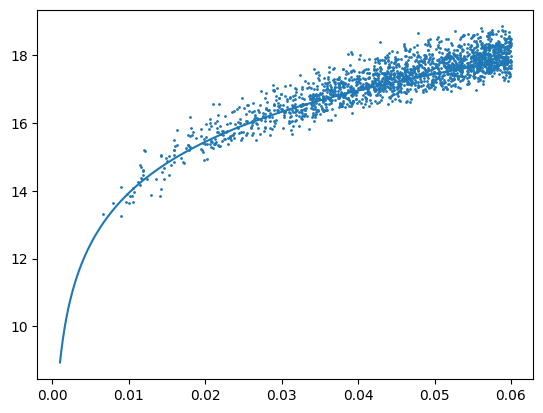

In [817]:
plt.plot(jnp.linspace(1e-3, 0.06, 1000), restrict(cosmo, {'Omega_m':0.23261527})(res, {"z":jnp.linspace(1e-3, 0.06, 1000)}))
plt.scatter(exp["z"], obs.mag, s=1)

In [804]:
res

{'H0': Array([69.61436099], dtype=float64),
 'coef': Array([-0.1413451 ,  3.42044009], dtype=float64),
 'variables': Array([[-0.12939469,  0.32457434,  0.3838094 , ...,  1.01392014,
          1.09775111,  0.9500584 ],
        [ 0.1583653 , -0.00953306, -0.0677698 , ..., -0.02818211,
         -0.0404505 , -0.03902821]], dtype=float64)}

In [787]:
hess = jax.hessian(L)(res)

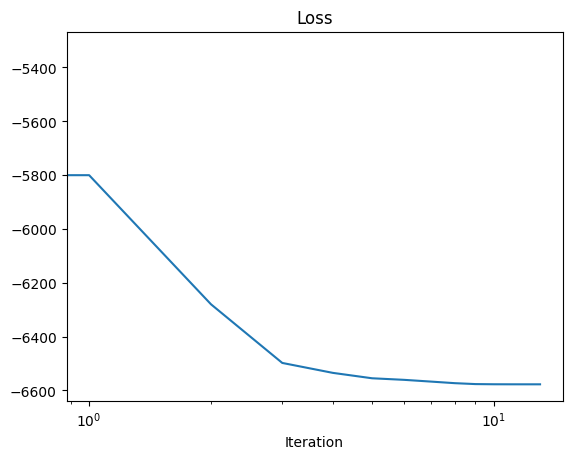

In [776]:
%matplotlib inline
plt.figure()
plt.plot(loss)
plt.title("Loss")
plt.xlabel('Iteration')
plt.xscale('log')

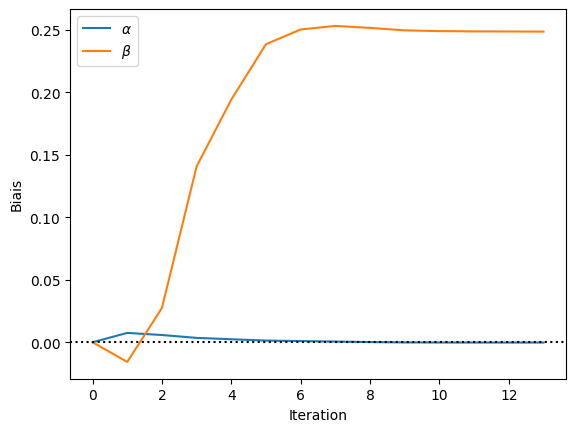

In [777]:
%matplotlib inline
plt.plot(jnp.array([param["coef"]-jnp.array([-0.14,3.15]) for param in iter_params]), label=[r"$\alpha$",r"$\beta$"])
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Biais')
plt.axhline(0, linestyle=':', color='k')
plt.show()

In [778]:
n_var = len(hess["coef"]["coef"])
n = hess["variables"]["variables"].shape[1]

In [779]:
row1 = jnp.hstack(
    (
        hess["coef"]["coef"],
        hess["coef"]["Omega_m"].reshape(n_var, 1),
        hess["coef"]["variables"].reshape(n_var, n * n_var),
    )
)
row2 = jnp.hstack(
    (
        hess["Omega_m"]["coef"].reshape(1, n_var),
        hess["Omega_m"]["Omega_m"].reshape(1, 1),
        hess["Omega_m"]["variables"].reshape(1, n * n_var),
    )
)
row3 = jnp.hstack(
    (
        hess["variables"]["coef"].reshape(n * n_var, n_var),
        hess["variables"]["Omega_m"].reshape(n * n_var, 1),
        hess["variables"]["variables"].reshape(n * n_var, n * n_var),
    )
)
flatten_hessian = jnp.vstack((row1, row2, row3))
cov_res= jnp.linalg.inv(0.5 * flatten_hessian)


### Bin number ?

In [ ]:
from tqdm.auto import tqdm

In [221]:
n_b = [2,3,4,5,6,7,8,9,10]
n = len(index)

In [232]:
z_bins = [edris.tools.log_bins(data.loc[index]["z"].min() - 1e-4, 0.06, n_bins) for n_bins in n_b]

In [224]:
results=[]
covs=[]

for n_bins in tqdm(n_b):
    exp, cov, obs = sncosmo_to_edris(res_sn, data, index[goods], n_bins=n_bins)
    x0 = {
          'mu_bins':jnp.zeros(len(exp['z_bins'])),
          'coef':jnp.array([-0.14,3.15]),
          'variables':jnp.array(obs.variables.reshape((2,-1 ))),
         }
    # Apply a first standardization guess
    delta_mu = obs.mag - edris.models.sn1a_model(x0, exp).mag
    interpol_matrix = edris.tools.linear_interpolation_matrix(jnp.log10(exp['z']), jnp.log10(exp['z_bins']))
    mu_start = jnp.linalg.solve(jnp.dot(interpol_matrix.T, interpol_matrix), jnp.dot(interpol_matrix.T, delta_mu))
    x0['mu_bins'] = mu_start
    L = lambda x: edris.tools.restrict(edris.models.likelihood, {'sigma_int':0.1,})(
        x, exp, cov_sel, obs, cosmo=edris.cosmo.binned_cosmo, truncated=False, restricted=False
    )
    res, loss, lmbda, iter_params = edris.minimize.tncg(L, x0, 1000, lmbda=1e4, tol=1e-2,
                                    verbose=True, max_iter_tncg=None,
                                    )
    hess = jax.hessian(L)(res)
    n_var = len(hess['coef']['coef'])
    n_bins = len(hess['mu_bins']['mu_bins'])
    n = hess['variables']['variables'].shape[1]
    row1 = jnp.hstack((hess['coef']['coef'], hess['coef']['mu_bins'], hess['coef']['variables'].reshape(n_var, n*n_var)))
    row2 = jnp.hstack((hess['mu_bins']['coef'], hess['mu_bins']['mu_bins'], hess['mu_bins']['variables'].reshape(n_bins,n*n_var)))
    row3 = jnp.hstack((hess['variables']['coef'].reshape(n*n_var,n_var),
                       hess['variables']['mu_bins'].reshape(n*n_var,n_bins),
                       hess['variables']['variables'].reshape(n*n_var,n*n_var)))
    flatten_hessian = jnp.vstack((row1, row2, row3))
    cov_res =  jnp.linalg.inv(0.5 * flatten_hessian)
    covs.append(cov_res)
    results.append(res)

  0%|          | 0/9 [00:00<?, ?it/s]

/global/homes/a/agillesl/.local/perlmutter/python-3.11/lib/python3.11/site-packages/jax/_src/lax/lax.py:516: ComplexWarning: Casting complex values to real discards the imaginary part
  return _convert_element_type(operand, new_dtype, weak_type=False)


iter 0/1000. Loss: -6.3e+03->-6.5e+03(-2.2e+02), ρ=0.87, λ=3000.0
iter 1/1000. Loss: -6.5e+03->-6.7e+03(-2.1e+02), ρ=0.74, λ=3000.0
iter 2/1000. Loss: -6.7e+03->-6.8e+03(-52), ρ=0.76, λ=900.0
iter 3/1000. Loss: -6.8e+03->-6.8e+03(-24), ρ=0.69, λ=900.0
iter 4/1000. Loss: -6.8e+03->-6.8e+03(-5.3), ρ=0.81, λ=270.0
iter 5/1000. Loss: -6.8e+03->-6.8e+03(-5.4), ρ=0.80, λ=81.0
iter 6/1000. Loss: -6.8e+03->-6.8e+03(-4.5), ρ=0.77, λ=24.3
iter 7/1000. Loss: -6.8e+03->-6.8e+03(-3.4), ρ=0.78, λ=7.29
iter 8/1000. Loss: -6.8e+03->-6.8e+03(-2.6), ρ=0.75, λ=2.187
iter 9/1000. Loss: -6.8e+03->-6.8e+03(-1), ρ=0.65, λ=2.187
iter 10/1000. Loss: -6.8e+03->-6.8e+03(-0.1), ρ=0.68, λ=2.187
iter 11/1000. Loss: -6.8e+03->-6.8e+03(-0.015), ρ=0.71, λ=2.187
iter 12/1000. Loss: -6.8e+03->-6.8e+03(-0.0027), ρ=0.73, λ=2.187
converged in 12 iterations
Completed in 94.90s


/global/homes/a/agillesl/.local/perlmutter/python-3.11/lib/python3.11/site-packages/jax/_src/lax/lax.py:516: ComplexWarning: Casting complex values to real discards the imaginary part
  return _convert_element_type(operand, new_dtype, weak_type=False)


iter 0/1000. Loss: -6.3e+03->-6.5e+03(-2.2e+02), ρ=0.87, λ=3000.0
iter 1/1000. Loss: -6.5e+03->-6.7e+03(-2.1e+02), ρ=0.74, λ=3000.0
iter 2/1000. Loss: -6.7e+03->-6.8e+03(-52), ρ=0.76, λ=900.0
iter 3/1000. Loss: -6.8e+03->-6.8e+03(-25), ρ=0.69, λ=900.0
iter 4/1000. Loss: -6.8e+03->-6.8e+03(-5.4), ρ=0.81, λ=270.0
iter 5/1000. Loss: -6.8e+03->-6.8e+03(-5.4), ρ=0.80, λ=81.0
iter 6/1000. Loss: -6.8e+03->-6.8e+03(-4.6), ρ=0.77, λ=24.3
iter 7/1000. Loss: -6.8e+03->-6.8e+03(-3.4), ρ=0.78, λ=7.29
iter 8/1000. Loss: -6.8e+03->-6.8e+03(-2.6), ρ=0.75, λ=2.187
iter 9/1000. Loss: -6.8e+03->-6.8e+03(-1), ρ=0.65, λ=2.187
iter 10/1000. Loss: -6.8e+03->-6.8e+03(-0.1), ρ=0.67, λ=2.187
iter 11/1000. Loss: -6.8e+03->-6.8e+03(-0.014), ρ=0.70, λ=2.187
iter 12/1000. Loss: -6.8e+03->-6.8e+03(-0.0026), ρ=0.73, λ=2.187
converged in 12 iterations
Completed in 95.40s


/global/homes/a/agillesl/.local/perlmutter/python-3.11/lib/python3.11/site-packages/jax/_src/lax/lax.py:516: ComplexWarning: Casting complex values to real discards the imaginary part
  return _convert_element_type(operand, new_dtype, weak_type=False)


iter 0/1000. Loss: -6.3e+03->-6.5e+03(-2.2e+02), ρ=0.87, λ=3000.0
iter 1/1000. Loss: -6.5e+03->-6.7e+03(-2.1e+02), ρ=0.74, λ=3000.0
iter 2/1000. Loss: -6.7e+03->-6.8e+03(-52), ρ=0.76, λ=900.0
iter 3/1000. Loss: -6.8e+03->-6.8e+03(-25), ρ=0.69, λ=900.0
iter 4/1000. Loss: -6.8e+03->-6.8e+03(-5.4), ρ=0.81, λ=270.0
iter 5/1000. Loss: -6.8e+03->-6.8e+03(-5.4), ρ=0.80, λ=81.0
iter 6/1000. Loss: -6.8e+03->-6.8e+03(-4.5), ρ=0.77, λ=24.3
iter 7/1000. Loss: -6.8e+03->-6.8e+03(-3.4), ρ=0.78, λ=7.29
iter 8/1000. Loss: -6.8e+03->-6.8e+03(-2.6), ρ=0.75, λ=2.187
iter 9/1000. Loss: -6.8e+03->-6.8e+03(-1), ρ=0.65, λ=2.187
iter 10/1000. Loss: -6.8e+03->-6.8e+03(-0.11), ρ=0.68, λ=2.187
iter 11/1000. Loss: -6.8e+03->-6.8e+03(-0.015), ρ=0.71, λ=2.187
iter 12/1000. Loss: -6.8e+03->-6.8e+03(-0.0028), ρ=0.73, λ=2.187
converged in 12 iterations
Completed in 94.51s


/global/homes/a/agillesl/.local/perlmutter/python-3.11/lib/python3.11/site-packages/jax/_src/lax/lax.py:516: ComplexWarning: Casting complex values to real discards the imaginary part
  return _convert_element_type(operand, new_dtype, weak_type=False)


iter 0/1000. Loss: -6.3e+03->-6.5e+03(-2.2e+02), ρ=0.87, λ=3000.0
iter 1/1000. Loss: -6.5e+03->-6.7e+03(-2.1e+02), ρ=0.74, λ=3000.0
iter 2/1000. Loss: -6.7e+03->-6.8e+03(-52), ρ=0.76, λ=900.0
iter 3/1000. Loss: -6.8e+03->-6.8e+03(-25), ρ=0.69, λ=900.0
iter 4/1000. Loss: -6.8e+03->-6.8e+03(-5.4), ρ=0.81, λ=270.0
iter 5/1000. Loss: -6.8e+03->-6.8e+03(-5.4), ρ=0.80, λ=81.0
iter 6/1000. Loss: -6.8e+03->-6.8e+03(-4.6), ρ=0.77, λ=24.3
iter 7/1000. Loss: -6.8e+03->-6.8e+03(-3.4), ρ=0.78, λ=7.29
iter 8/1000. Loss: -6.8e+03->-6.8e+03(-2.7), ρ=0.76, λ=2.187
iter 9/1000. Loss: -6.8e+03->-6.8e+03(-1.1), ρ=0.65, λ=2.187
iter 10/1000. Loss: -6.8e+03->-6.8e+03(-0.11), ρ=0.68, λ=2.187
iter 11/1000. Loss: -6.8e+03->-6.8e+03(-0.015), ρ=0.71, λ=2.187
iter 12/1000. Loss: -6.8e+03->-6.8e+03(-0.0028), ρ=0.73, λ=2.187
converged in 12 iterations
Completed in 96.31s


/global/homes/a/agillesl/.local/perlmutter/python-3.11/lib/python3.11/site-packages/jax/_src/lax/lax.py:516: ComplexWarning: Casting complex values to real discards the imaginary part
  return _convert_element_type(operand, new_dtype, weak_type=False)


iter 0/1000. Loss: -6.3e+03->-6.5e+03(-2.2e+02), ρ=0.87, λ=3000.0
iter 1/1000. Loss: -6.5e+03->-6.7e+03(-2.1e+02), ρ=0.74, λ=3000.0
iter 2/1000. Loss: -6.7e+03->-6.8e+03(-52), ρ=0.76, λ=900.0
iter 3/1000. Loss: -6.8e+03->-6.8e+03(-25), ρ=0.69, λ=900.0
iter 4/1000. Loss: -6.8e+03->-6.8e+03(-5.4), ρ=0.81, λ=270.0
iter 5/1000. Loss: -6.8e+03->-6.8e+03(-5.4), ρ=0.80, λ=81.0
iter 6/1000. Loss: -6.8e+03->-6.8e+03(-4.5), ρ=0.77, λ=24.3
iter 7/1000. Loss: -6.8e+03->-6.8e+03(-3.3), ρ=0.78, λ=7.29
iter 8/1000. Loss: -6.8e+03->-6.8e+03(-2.6), ρ=0.75, λ=2.187
iter 9/1000. Loss: -6.8e+03->-6.8e+03(-1), ρ=0.65, λ=2.187
iter 10/1000. Loss: -6.8e+03->-6.8e+03(-0.1), ρ=0.68, λ=2.187
iter 11/1000. Loss: -6.8e+03->-6.8e+03(-0.015), ρ=0.71, λ=2.187
iter 12/1000. Loss: -6.8e+03->-6.8e+03(-0.0027), ρ=0.73, λ=2.187
converged in 12 iterations
Completed in 108.10s


/global/homes/a/agillesl/.local/perlmutter/python-3.11/lib/python3.11/site-packages/jax/_src/lax/lax.py:516: ComplexWarning: Casting complex values to real discards the imaginary part
  return _convert_element_type(operand, new_dtype, weak_type=False)


iter 0/1000. Loss: -6.3e+03->-6.5e+03(-2.2e+02), ρ=0.87, λ=3000.0
iter 1/1000. Loss: -6.5e+03->-6.7e+03(-2.1e+02), ρ=0.74, λ=3000.0
iter 2/1000. Loss: -6.7e+03->-6.8e+03(-52), ρ=0.76, λ=900.0
iter 3/1000. Loss: -6.8e+03->-6.8e+03(-25), ρ=0.69, λ=900.0
iter 4/1000. Loss: -6.8e+03->-6.8e+03(-5.4), ρ=0.81, λ=270.0
iter 5/1000. Loss: -6.8e+03->-6.8e+03(-5.4), ρ=0.80, λ=81.0
iter 6/1000. Loss: -6.8e+03->-6.8e+03(-4.5), ρ=0.77, λ=24.3
iter 7/1000. Loss: -6.8e+03->-6.8e+03(-3.3), ρ=0.78, λ=7.29
iter 8/1000. Loss: -6.8e+03->-6.8e+03(-2.6), ρ=0.75, λ=2.187
iter 9/1000. Loss: -6.8e+03->-6.8e+03(-1), ρ=0.65, λ=2.187
iter 10/1000. Loss: -6.8e+03->-6.8e+03(-0.1), ρ=0.68, λ=2.187
iter 11/1000. Loss: -6.8e+03->-6.8e+03(-0.015), ρ=0.71, λ=2.187
iter 12/1000. Loss: -6.8e+03->-6.8e+03(-0.0027), ρ=0.73, λ=2.187
converged in 12 iterations
Completed in 95.51s


/global/homes/a/agillesl/.local/perlmutter/python-3.11/lib/python3.11/site-packages/jax/_src/lax/lax.py:516: ComplexWarning: Casting complex values to real discards the imaginary part
  return _convert_element_type(operand, new_dtype, weak_type=False)


iter 0/1000. Loss: -6.3e+03->-6.5e+03(-2.2e+02), ρ=0.87, λ=3000.0
iter 1/1000. Loss: -6.5e+03->-6.7e+03(-2.1e+02), ρ=0.74, λ=3000.0
iter 2/1000. Loss: -6.7e+03->-6.8e+03(-52), ρ=0.76, λ=900.0
iter 3/1000. Loss: -6.8e+03->-6.8e+03(-25), ρ=0.69, λ=900.0
iter 4/1000. Loss: -6.8e+03->-6.8e+03(-5.4), ρ=0.81, λ=270.0
iter 5/1000. Loss: -6.8e+03->-6.8e+03(-5.4), ρ=0.80, λ=81.0
iter 6/1000. Loss: -6.8e+03->-6.8e+03(-4.6), ρ=0.77, λ=24.3
iter 7/1000. Loss: -6.8e+03->-6.8e+03(-3.3), ρ=0.78, λ=7.29
iter 8/1000. Loss: -6.8e+03->-6.8e+03(-2.6), ρ=0.75, λ=2.187
iter 9/1000. Loss: -6.8e+03->-6.8e+03(-1), ρ=0.65, λ=2.187
iter 10/1000. Loss: -6.8e+03->-6.8e+03(-0.1), ρ=0.68, λ=2.187
iter 11/1000. Loss: -6.8e+03->-6.8e+03(-0.015), ρ=0.71, λ=2.187
iter 12/1000. Loss: -6.8e+03->-6.8e+03(-0.0027), ρ=0.73, λ=2.187
converged in 12 iterations
Completed in 95.11s


/global/homes/a/agillesl/.local/perlmutter/python-3.11/lib/python3.11/site-packages/jax/_src/lax/lax.py:516: ComplexWarning: Casting complex values to real discards the imaginary part
  return _convert_element_type(operand, new_dtype, weak_type=False)


iter 0/1000. Loss: -6.3e+03->-6.5e+03(-2.2e+02), ρ=0.87, λ=3000.0
iter 1/1000. Loss: -6.5e+03->-6.7e+03(-2.1e+02), ρ=0.74, λ=3000.0
iter 2/1000. Loss: -6.7e+03->-6.8e+03(-52), ρ=0.76, λ=900.0
iter 3/1000. Loss: -6.8e+03->-6.8e+03(-25), ρ=0.69, λ=900.0
iter 4/1000. Loss: -6.8e+03->-6.8e+03(-5.4), ρ=0.81, λ=270.0
iter 5/1000. Loss: -6.8e+03->-6.8e+03(-5.4), ρ=0.80, λ=81.0
iter 6/1000. Loss: -6.8e+03->-6.8e+03(-4.5), ρ=0.77, λ=24.3
iter 7/1000. Loss: -6.8e+03->-6.8e+03(-3.3), ρ=0.78, λ=7.29
iter 8/1000. Loss: -6.8e+03->-6.8e+03(-2.6), ρ=0.75, λ=2.187
iter 9/1000. Loss: -6.8e+03->-6.8e+03(-1), ρ=0.65, λ=2.187
iter 10/1000. Loss: -6.8e+03->-6.8e+03(-0.1), ρ=0.68, λ=2.187
iter 11/1000. Loss: -6.8e+03->-6.8e+03(-0.015), ρ=0.71, λ=2.187
iter 12/1000. Loss: -6.8e+03->-6.8e+03(-0.0027), ρ=0.73, λ=2.187
converged in 12 iterations
Completed in 97.57s


/global/homes/a/agillesl/.local/perlmutter/python-3.11/lib/python3.11/site-packages/jax/_src/lax/lax.py:516: ComplexWarning: Casting complex values to real discards the imaginary part
  return _convert_element_type(operand, new_dtype, weak_type=False)


iter 0/1000. Loss: -6.3e+03->-6.5e+03(-2.2e+02), ρ=0.87, λ=3000.0
iter 1/1000. Loss: -6.5e+03->-6.7e+03(-2.1e+02), ρ=0.74, λ=3000.0
iter 2/1000. Loss: -6.7e+03->-6.8e+03(-52), ρ=0.76, λ=900.0
iter 3/1000. Loss: -6.8e+03->-6.8e+03(-25), ρ=0.69, λ=900.0
iter 4/1000. Loss: -6.8e+03->-6.8e+03(-5.4), ρ=0.81, λ=270.0
iter 5/1000. Loss: -6.8e+03->-6.8e+03(-5.5), ρ=0.80, λ=81.0
iter 6/1000. Loss: -6.8e+03->-6.8e+03(-4.5), ρ=0.77, λ=24.3
iter 7/1000. Loss: -6.8e+03->-6.8e+03(-3.3), ρ=0.78, λ=7.29
iter 8/1000. Loss: -6.8e+03->-6.8e+03(-2.6), ρ=0.75, λ=2.187
iter 9/1000. Loss: -6.8e+03->-6.8e+03(-1), ρ=0.65, λ=2.187
iter 10/1000. Loss: -6.8e+03->-6.8e+03(-0.1), ρ=0.68, λ=2.187
iter 11/1000. Loss: -6.8e+03->-6.8e+03(-0.014), ρ=0.71, λ=2.187
iter 12/1000. Loss: -6.8e+03->-6.8e+03(-0.0027), ρ=0.73, λ=2.187
converged in 12 iterations
Completed in 96.87s


In [ ]:
n_var=2
for img, n_bins in zip(covs,n_b):
    fig, ax2 = plt.subplots(figsize=(7,7))
    sigma_inv = jnp.diag(1/jnp.sqrt(jnp.diag(img)))
    corr = jnp.matmul(sigma_inv,jnp.matmul(img, sigma_inv))

    im2 = ax2.imshow(corr[:n_bins+2,:n_bins+2], norm = colors.Normalize(vmin=-1.0, vmax=1.0))
    ax2.set_title('Correlation of coefs and mu_bins')
    ax2.figure.colorbar(im2, ax=ax2)

    plt.show()


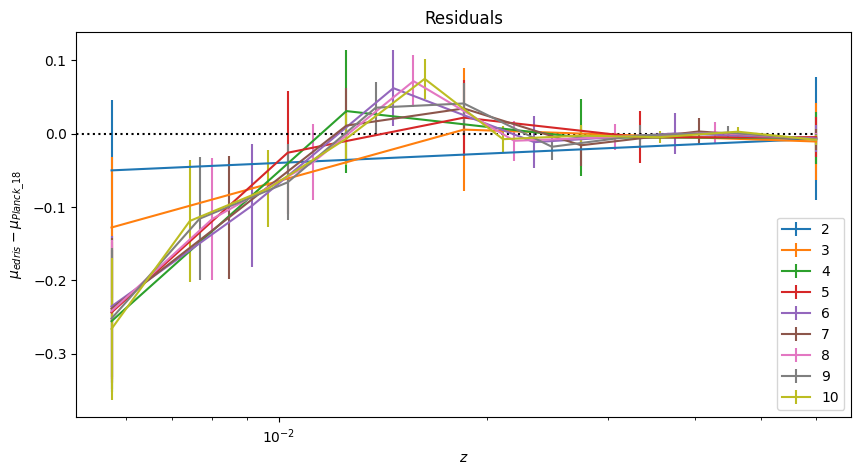

In [247]:
plt.figure('residuals', figsize=(10,5))
for bins, cov, res in zip(z_bins, covs, results):
    plt.errorbar(bins, res['mu_bins'] - (jnp.array(cosmo.distmod(np.array(bins))) - 19.3),
                 yerr=jnp.sqrt(jnp.diag(cov_res[2:2+len(bins),2:2+len(bins)])),
                 label=f'{len(bins)}')
plt.title('Residuals')
plt.xlabel("$z$")
plt.ylabel("$\mu_{edris} - \mu_{Planck\_18}$")
# plt.savefig(f'../figures/edris_{n}sn_bias.png')
plt.xscale('log')
plt.hlines(0,1e-4,0.06, linestyle='dotted', color='k')
plt.legend()

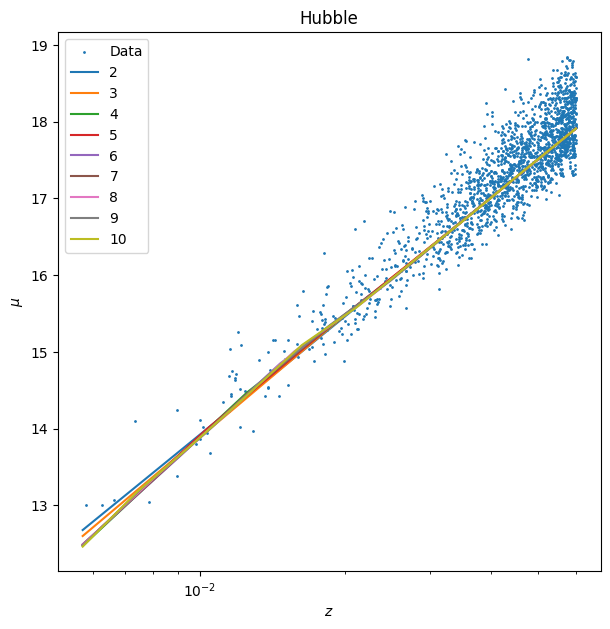

In [249]:
plt.figure('hubble', figsize=(7,7))
plt.scatter(exp['z'], obs.mag, s=1, label='Data')
for bins, res in zip(z_bins, results):
    plt.plot(bins, res['mu_bins'], label=f'{len(bins)}')
    plt.xscale("log")
    plt.title('Hubble')
    plt.xlabel("$z$")
    plt.ylabel("$\mu$")
    plt.legend()

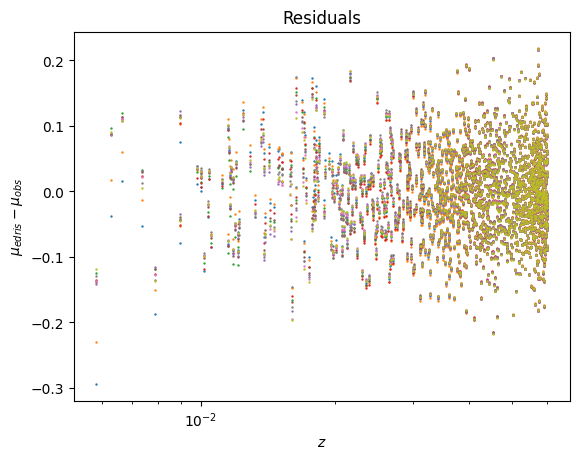

In [258]:
plt.figure('residuals')
for res,bins in zip(results,z_bins):
    plt.scatter(exp['z'], obs.mag-edris.models.sn1a_model(res, {'z_bins':bins, 'z':exp["z"]}).mag, s=.5, alpha=1)
plt.title('Residuals')
plt.xlabel("$z$")
plt.ylabel("$\mu_{edris} - \mu_{obs}$")
# plt.savefig(f'../figures/edris_{n}sn_bias.png')
plt.xscale('log')

# Fit cosmo

In [826]:
with open("outdir/SN_Uchuu_edris_res.pkl", 'rb') as f:
    exp = pickle.load(f)
    obs = pickle.load(f)
    cov = pickle.load(f)
    res = pickle.load(f)
    cov_res = pickle.load(f)
    iter_params = pickle.load(f)

In [827]:
with open("outdir/SN_Uchuu_modelcov.pkl", 'rb') as f:
    lc = pickle.load(f)
    data = pickle.load(f)
    res_sn = pickle.load(f)
    meta = pickle.load(f)

In [828]:
std_mag = obs.mag - jnp.matmul(res['coef'], res['variables'])
std_mag

Array([17.76453228, 17.12833153, 16.63310237, ..., 17.07260448,
       17.77618433, 15.63547969], dtype=float64)

In [829]:
exp

{'z': Array([0.0547672 , 0.04463238, 0.03537348, ..., 0.04233439, 0.05700946,
        0.02114542], dtype=float64),
 'z_bins': Array([0.0065469 , 0.01019669, 0.01588117, 0.02473465, 0.03852379,
        0.06000014], dtype=float64)}

In [845]:
from scipy.interpolate import interp1d
from astropy.constants import c
from scipy.integrate import quad
from astropy.cosmology import Planck18 as cosmo
from scipy.optimize import curve_fit

def fit_cosmo(z_bins, mu_bins, cov):
    def dist(z, Omega_r, Omega_m, Omega_l, H0):
        Omega_k = 1. - Omega_m - Omega_l - Omega_r
        return quad(lambda z1 : (Omega_m*(1+z1)**3 + Omega_r*(1+z1)**4 + Omega_k*(1+z1)**2 + Omega_l)**(-0.5)*c.value*10**(-3)/H0, 0, z)

    dist_vec = np.vectorize(dist)

    def z_to_mag(z, Omega_m, Omega_r, Omega_l=cosmo.Ode0, Mb=25-19.3, H0=cosmo.H0.value):
        return 5.0 * np.log10(abs((z + 1.0) * dist_vec(z, Omega_r, Omega_m, Omega_l, H0)[0])) + Mb

    popt, pcov, = curve_fit(z_to_mag,
                           z_bins,
                           mu_bins,
                           sigma=cov,
                           p0=[cosmo.Om0, cosmo.Ogamma0 + cosmo.Onu0],
                           bounds=([0., 0.],[1., 1.]),
                          )
    mag_to_z_cosmo = jnp.vectorize(interp1d(z_to_mag(np.linspace(1e-6, 0.1, 10000), *popt), np.linspace(1e-6, 0.1,10000)), signature='(k)->(k)')

    return popt, pcov, mag_to_z_cosmo, z_to_mag

In [846]:
fit_cosmo(exp['z_bins'], res['mu_bins'], cov_res[n_var:n_bins+n_var,n_var:n_bins+n_var])

(array([1.        , 0.61969679]),
 array([[ 69334.84048377, -34085.95682956],
        [-34085.95682956,  16757.27285976]]),
 <function scipy.interpolate._interpolate.vectorize.<locals>.wrapped(x)>,
 <function __main__.fit_cosmo.<locals>.z_to_mag(z, Omega_m, Omega_r, Omega_l=0.6888463055445441, Mb=5.699999999999999, H0=67.66)>)

In [847]:
n_var = 2

popt, pcov, mag_to_z_cosmo, z_to_mag = fit_cosmo(exp['z_bins'], res['mu_bins'], cov_res[n_var:n_bins+n_var,n_var:n_bins+n_var])

data['calc_z_cosmo'] = np.NaN
data.loc[data[data['used_edris']].index, 'calc_z_cosmo'] = mag_to_z_cosmo(std_mag)

# with open(f"outdir/SN_Uchuu_modelcov.pkl", 'wb') as f:
#     pickle.dump(dset.data, f)
#     pickle.dump(data, f)
#     pickle.dump(results, f)
#     pickle.dump(meta, f)


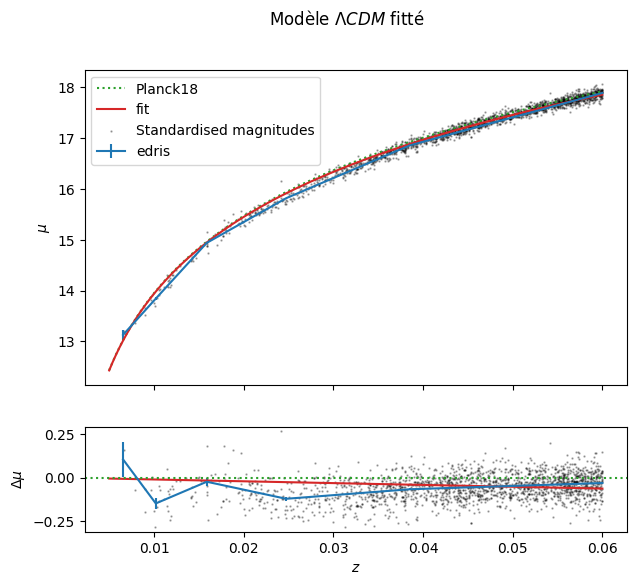

In [848]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex='col', figsize=(7,6), gridspec_kw={'height_ratios': [3,1]})

ax1.errorbar(exp['z_bins'], res['mu_bins'], yerr=jnp.sqrt(jnp.diag(cov_res[2:2+n_bins,2:2+n_bins])), color='tab:blue', label='edris')
ax1.plot(np.linspace(5e-3, 0.06,1000), mag_Planck18(np.linspace(5e-3, 0.06,1000)), color='tab:green', linestyle=':', label='Planck18')
ax1.plot(np.linspace(5e-3, 0.06,1000), z_to_mag(np.linspace(5e-3, 0.06,1000), *popt), color='tab:red', label='fit')

ax1.scatter(exp["z"], std_mag, s=.5, alpha=.3, color='k', label='Standardised magnitudes')
ax1.legend()
ax1.set_ylabel(r'$\mu$')
fig.suptitle(r"Modèle $\Lambda CDM$ fitté")

ax2.errorbar(exp['z_bins'], res['mu_bins']-mag_Planck18(exp["z_bins"]), yerr=jnp.sqrt(jnp.diag(cov_res[2:2+n_bins,2:2+n_bins])), color='tab:blue')
ax2.plot(np.linspace(5e-3, 0.06,1000), z_to_mag(np.linspace(5e-3, 0.06,1000), *popt) - mag_Planck18(np.linspace(5e-3, 0.06, 1000)), color='tab:red')
ax2.scatter(exp["z"], std_mag - mag_Planck18(exp["z"]), color='k', s=.5, alpha=.3)
lims = ax2.get_xlim()
ax2.hlines(0., xmin=lims[0], xmax=lims[1], color='tab:green', linestyle=':')
ax2.set_xlim(*lims)
ax2.set_ylabel(r'$\Delta\mu$')
ax2.set_xlabel(r'$z$')
plt.savefig('../figures/edris_model_fit.png')

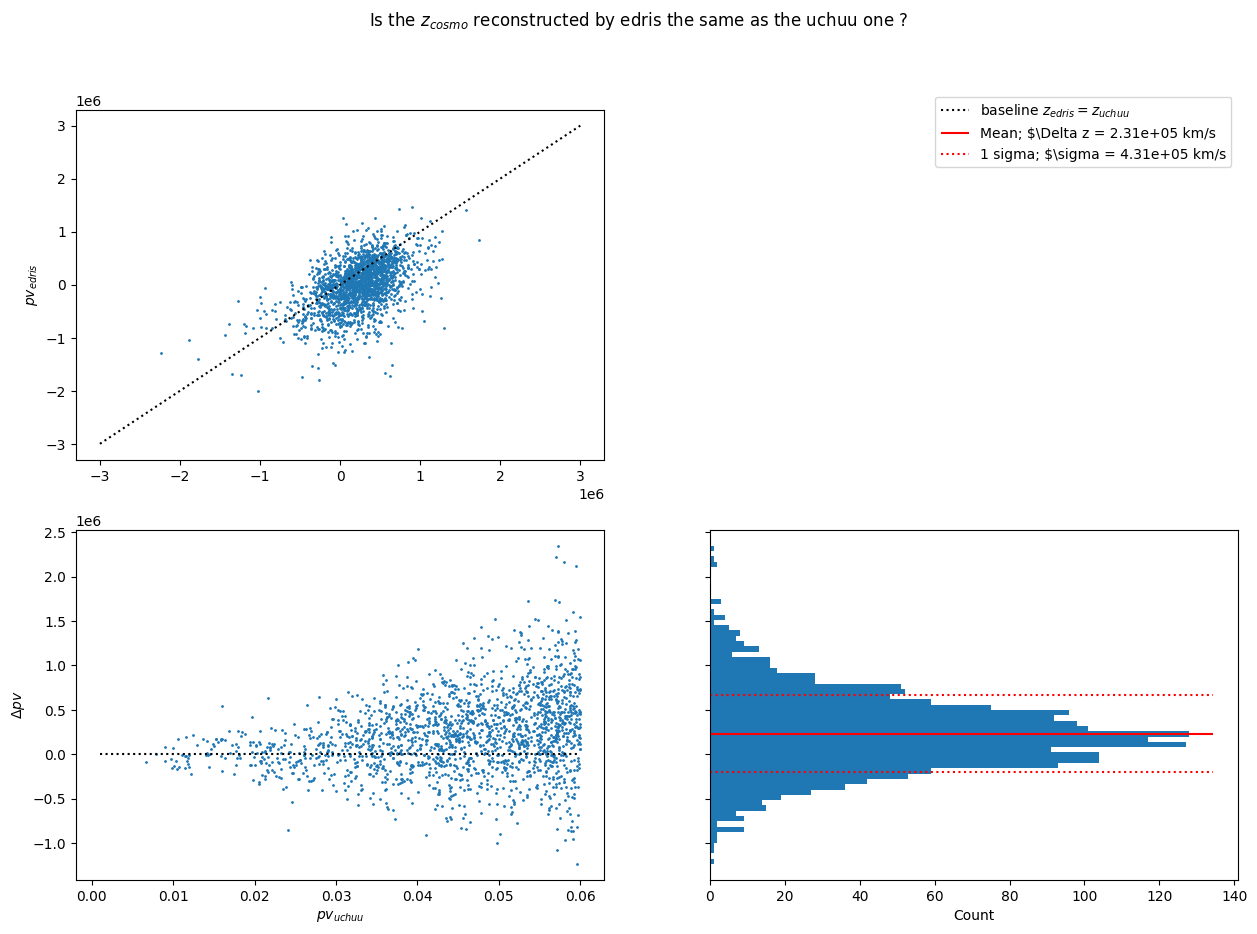

In [835]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey='row', figsize=(15,10))
ax1.scatter((data[data["used_edris"]]["z"] - data[data["used_edris"]]['z_cosmo'])*c,
            (data[data["used_edris"]]["z"] - data[data["used_edris"]]['calc_z_cosmo'])*c,
            s=1)
ax1.plot(np.linspace(-0.01, 0.01, 1000)*c, np.linspace(-0.01, 0.01, 1000)*c, ':k', label='baseline $z_{edris}=z_{uchuu}$')
ax1.set_ylabel(r'$pv_{edris}$')
fig.suptitle(r'Is the $z_{cosmo}$ reconstructed by edris the same as the uchuu one ?')

ax2.axis('off')

ax3.scatter(data[data["used_edris"]]["z"],
            (data[data["used_edris"]]['calc_z_cosmo'] - data[data["used_edris"]]["z_cosmo"])*c,
            s=1)
ax3.plot(np.linspace(1e-3, 0.06, 1000), np.zeros(1000), ':k')
ax3.set_xlabel(r'$pv_{uchuu}$')
ax3.set_ylabel(r'$\Delta pv$')

delta_pv = (data[data["used_edris"]]['calc_z_cosmo']-data[data["used_edris"]]["z_cosmo"])*c

ax4.hist(delta_pv, bins=60, orientation='horizontal')
m = ax4.get_xlim()[1]
ax4.hlines(delta_pv.mean(), xmin=0, xmax=m, color='r', label=fr'Mean; $\Delta z = {delta_pv.mean():.2e} km/s')
ax4.hlines([delta_pv.mean() - delta_pv.std(), delta_pv.mean() + delta_pv.std()], xmin=0, xmax=m, color='r', linestyle=':', label=fr'1 sigma; $\sigma = {delta_pv.std():.2e} km/s')
ax4.set_xlabel(r'Count')
fig.legend(loc=1, bbox_to_anchor=(0.4, 0.4, 0.5, 0.5))
plt.savefig('../figures/edris_vp_uchuu_vs_edris.png')

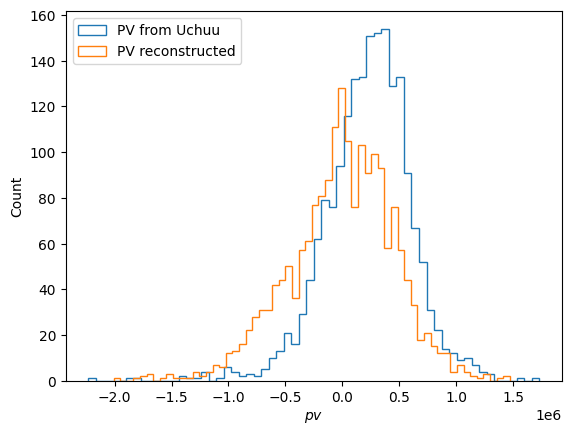

In [836]:
# _=plt.hist(data[data["used_edris"]]["true_z_cosmo"] - data[data["used_edris"]]["calc_z_cosmo"], bins=60, histtype="step")
_=plt.hist((data[data["used_edris"]]["z"] - data[data["used_edris"]]["z_cosmo"])*c, bins=60, histtype="step", label='PV from Uchuu')
_=plt.hist((data[data["used_edris"]]["z"] - data[data["used_edris"]]["calc_z_cosmo"])*c, bins=60, histtype="step", label='PV reconstructed')
plt.xlabel(r"$pv$")
plt.ylabel("Count")
plt.legend()

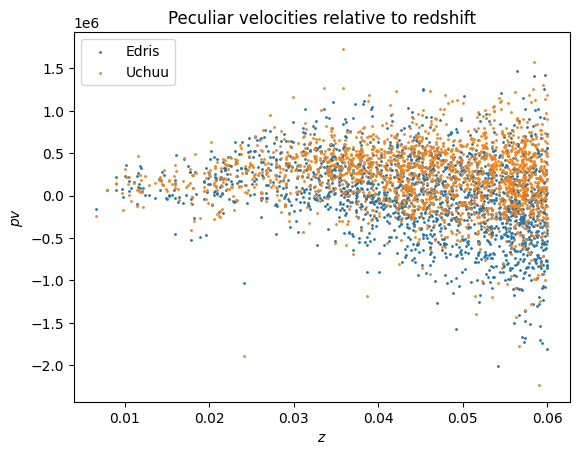

In [837]:
plt.scatter(data[data["used_edris"]]["z"], (data[data["used_edris"]]["z"] - data[data["used_edris"]]["calc_z_cosmo"])*c, s=1, label='Edris')
plt.scatter(data[data["used_edris"]]["z"], (data[data["used_edris"]]["z"] - data[data["used_edris"]]["z_cosmo"])*c, s=1, label='Uchuu')
plt.ylabel(r'$pv$')
plt.xlabel(r'$z$')
plt.title(r'Peculiar velocities relative to redshift')
plt.legend()

In [221]:
with open("outdir/SN_Uchuu_modelcov.pkl", 'wb') as f:
    pickle.dump(lc, f)
    pickle.dump(data, f)
    pickle.dump(res_sn, f)
    pickle.dump(meta, f)

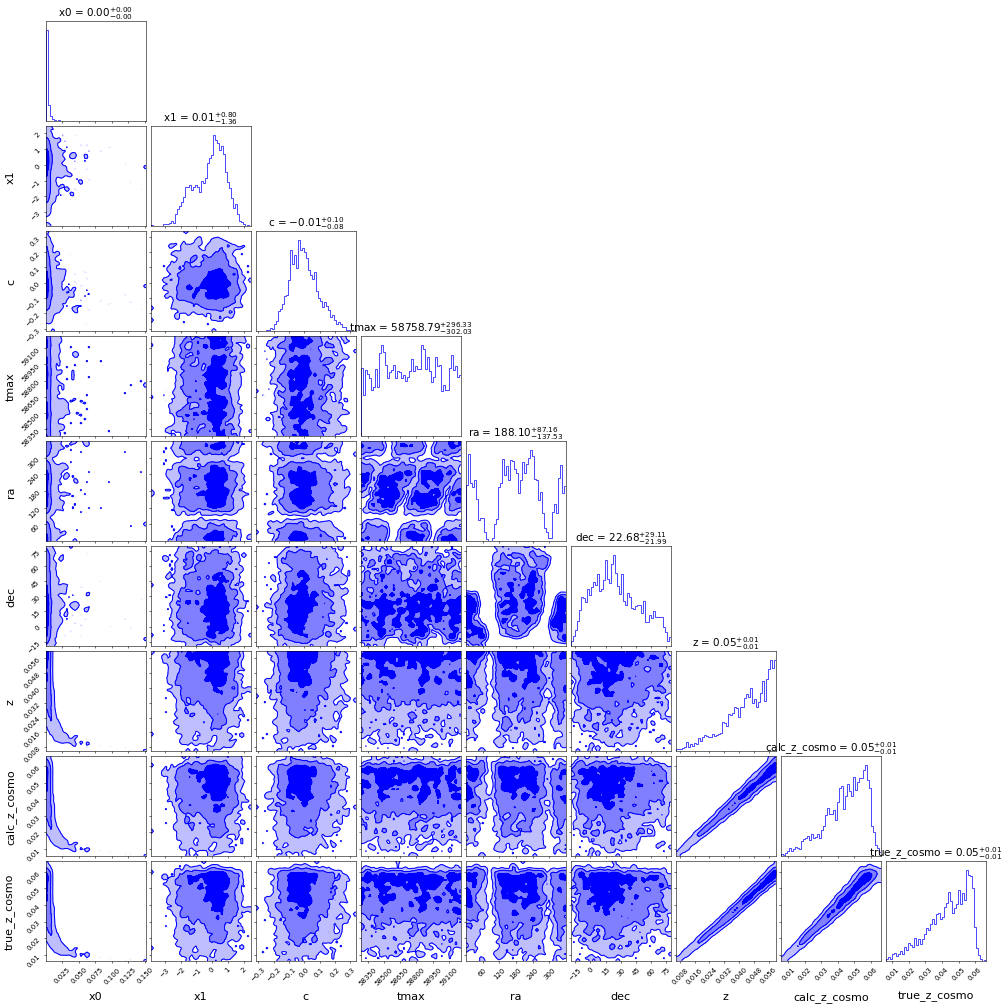

In [ ]:
_=corner_(data[data["used_edris"]], var_names=['x0', 'x1', 'c', 'tmax', 'ra', 'dec', 'z', 'calc_z_cosmo', 'true_z_cosmo'])

### Likelihood profiling

In [190]:
profile = lambda x,y : edris.models.likelihood({'mu_bins':jnp.array(cosmo.distmod(np.array(exp['z_bins']))) - 19.3,
      'coef': jnp.array([x,y]),
      'variables':jnp.array(obs.variables.reshape((2,-1 ))),
      'sigma_int':0.1},
        exp, cov_sel, obs, cosmo=edris.cosmo.binned_cosmo, truncated=False, restricted=False
)
profile=jnp.vectorize(profile)
profile=jax.jit(profile)

In [141]:
xx, yy = np.meshgrid(np.linspace(-.2,-.08, 1000), np.linspace(3.0,3.5,1000))

In [142]:
profile_L = profile(xx,yy)

In [143]:
profile_L.min()

Array(-6280.9726096, dtype=float64)

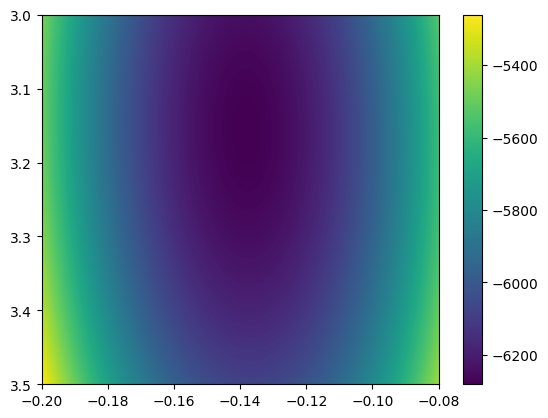

In [144]:
plt.imshow(profile_L, extent=[-.2,-.08,3.5,3], aspect='auto')
plt.colorbar()

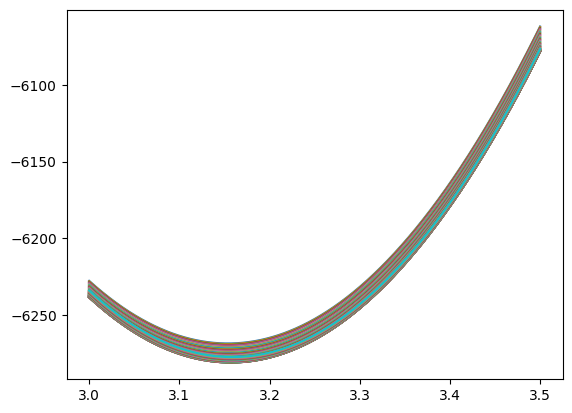

In [145]:
plt.figure()
_=plt.plot(yy[:,450:550], profile_L[:,450:550])

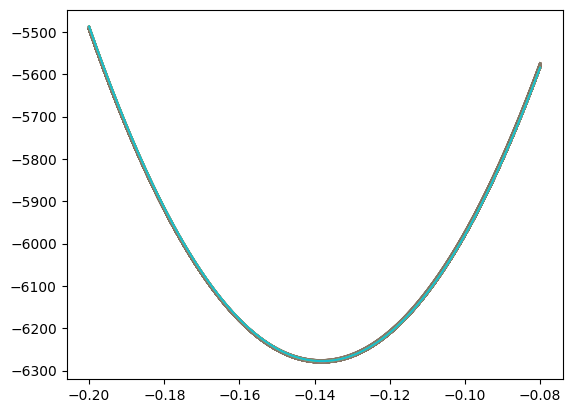

In [146]:
plt.figure()
_=plt.plot(xx[200:400,:].T, profile_L[200:400,:].T)

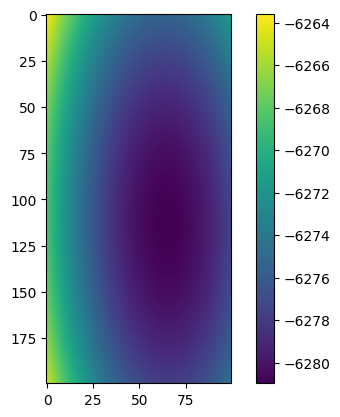

In [147]:
plt.figure()
plt.imshow(profile_L[200:400,450:550], cmap='viridis')
plt.colorbar()

In [190]:
profile = lambda x,y : edris.models.likelihood({'mu_bins':jnp.array(cosmo.distmod(np.array(exp['z_bins']))) - 19.3,
      'coef': jnp.array([x,y]),
      'variables':jnp.array(obs.variables.reshape((2,-1 ))),
      'sigma_int':0.1},
        exp, cov_sel, obs, cosmo=edris.cosmo.binned_cosmo, truncated=False, restricted=False
)
profile=jnp.vectorize(profile)
profile=jax.jit(profile)

In [141]:
xx, yy = np.meshgrid(np.linspace(-.2,-.08, 1000), np.linspace(3.0,3.5,1000))

In [142]:
profile_L = profile(xx,yy)

In [143]:
profile_L.min()

Array(-6280.9726096, dtype=float64)

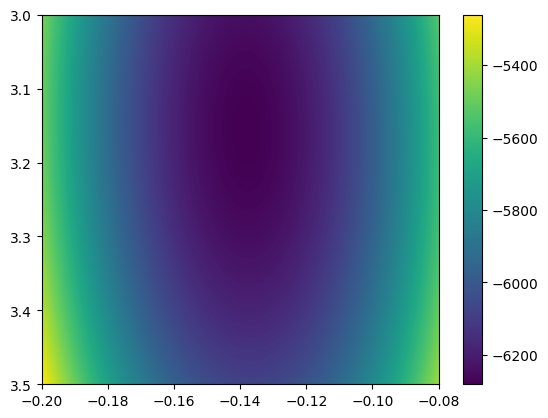

In [144]:
plt.imshow(profile_L, extent=[-.2,-.08,3.5,3], aspect='auto')
plt.colorbar()

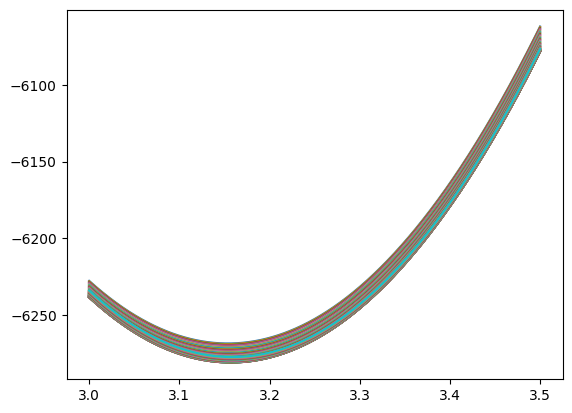

In [145]:
plt.figure()
_=plt.plot(yy[:,450:550], profile_L[:,450:550])

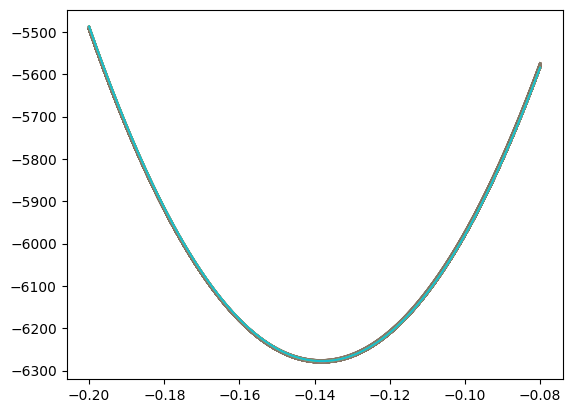

In [146]:
plt.figure()
_=plt.plot(xx[200:400,:].T, profile_L[200:400,:].T)

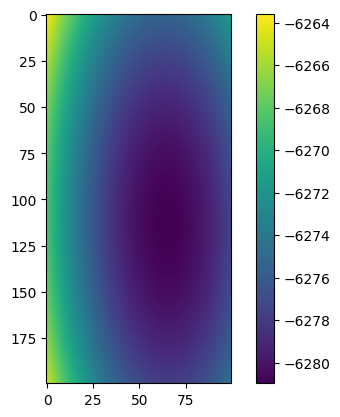

In [147]:
plt.figure()
plt.imshow(profile_L[200:400,450:550], cmap='viridis')
plt.colorbar()

# MOCKSURVEY

In [6]:
import sncosmo
from mocksurvey.simulations import *


In [16]:
with open("data/SN_Uchuu.pkl", 'rb') as f:
    lc = pickle.load(f)
    data = pickle.load(f)
    res_sn = pickle.load(f)

In [32]:
survey = extract_ztf()
snia = SNeIa_full_bgs()
snia.set_data(data)
dset = skysurvey.DataSet(data=lc, targets=snia, survey=survey)

In [43]:
detected = dset.targets.data[dset.targets.data["good"]].index

In [45]:
output = dset.data.loc[detected].join(dset.targets.data.loc[detected])

In [46]:
# output = get_detected_sn(dset, detlimit=7, detnumber= 10, per_band=False)
output = get_sn_index(output)
output = get_luminosity_distance(output, snia)
output = get_effective_wavelength(output)
output = eliminate_points_not_in_model(output, snia)
output = get_trueflux_and_amplitude(output, snia)
output = get_snr(output)

INFO:root:Getting SN indexes
INFO:root:Getting luminosity distances in Mpc
INFO:root:Getting effective wavelengths
INFO:root:Eliminating points not in model
INFO:root:Getting true fluxes and amplitudes
INFO:root:Getting snr


In [47]:
output = discard_small_snr(output, threshold=0)
output = discard_skysurvey_flux(output)

INFO:root:Discarding small snr
INFO:root:Getting SN indexes
INFO:root:discarding skysurvey flux


In [48]:
output['survey'] = 'ztf'

In [49]:
output.to_csv("tests.csv", encoding='utf-8', index=False)

In [50]:
from tqdm.auto import tqdm

In [51]:
def f(x, a, b, c):
    """
    """
    return a*x**2 + b*x + c


def generate_mock_sample(mock_ztf_path):
    """
    Generates the mock sample based on the generated mock survey.
    
    !! Need to generate the mock sample first
    
    Parameters:
    ------------
    mock_ztf_path : str
        Path to the generated ztf mock sample
    
    Returns:
    ------------
    : pandas.DataFrame
        Mock spectra
    
    """
    d_time = np.array([])
    d_wavelength = np.array([])
    d_flux = np.array([])
    d_fluxerr = np.array([])
    d_valid = np.array([])
    d_spec = np.array([])
    d_exptime = np.array([])
    d_snid = np.array([])
    d_flux_true = np.array([])
    d_x0 = np.array([])
    d_x1 = np.array([])
    d_c = np.array([])
    d_t0 = np.array([])
    d_mwebv = np.array([])
    d_z = np.array([])
    
    mock_survey = pd.read_csv(mock_ztf_path)
    idx = mock_survey['fluxtrue']!=0
    mock_survey = mock_survey[idx]
    
    mock_x0 = mock_survey['x0']
    mock_x1 = mock_survey['x1']
    mock_c = mock_survey['c']
    mock_t0 = mock_survey['t0']
    mock_z = mock_survey['z']
    mock_mwebv = mock_survey['mwebv']
    mock_snid = np.unique(mock_survey['snid'])
    
    
    n = len(mock_snid)
    length_wave = np.array([218, 437, 3258, 656, 868])
    popt = np.array([-7.87649259e-07,  1.08382223e-02, -2.44390307e+01])
    a, b, c = popt
    for i in tqdm(range(n)):
        x0 = np.array(mock_x0[mock_survey['snid']==i])[0]
        x1 = np.array(mock_x1[mock_survey['snid']==i])[0]
        c = np.array(mock_c[mock_survey['snid']==i])[0]
        t0 = np.array(mock_t0[mock_survey['snid']==i])[0]
        z = np.array(mock_z[mock_survey['snid']==i])[0]
        mwebv = np.array(mock_mwebv[mock_survey['snid']==i])[0]
        
        
        wave_size = np.random.choice(length_wave)
        min_wave = np.random.uniform(2900., 3400.)
        max_wave = np.random.uniform(9000., 11000.)
        wavelength = np.linspace(min_wave, max_wave, wave_size)
        mjd = np.random.choice(mock_survey['time'][mock_survey['snid']==i])
        
        source = sncosmo.get_source('salt2', version='2.4')
        dust = sncosmo.CCM89Dust()
        model = sncosmo.Model(source=source, effects=[dust], effect_names=['mw'], effect_frames=['obs'])
        
        p = {'z':z, 't0':t0, 'x0':x0, 'x1': x1, 'c': c, 'ebv':mwebv, 'r_v':3.1}
        model.parameters = list(p.values()) 
        
        
        min_w = model.minwave()
        max_w = model.maxwave()
        
        try:
            flux_true = model.flux(mjd, wavelength)
        except:
            try:
                flux_true = model.flux(mjd, wavelength[wavelength<max_w])
                wavelength = wavelength[wavelength<max_w]
            except:
                flux_true = model.flux(mjd, wavelength[wavelength>min_w])
                wavelength = wavelength[wavelength>min_w]
        #j = np.random.randint(0, N)
        #err_ = spec_data['fluxerr'][j]
        #flx_ = spec_data['flux'][j]
        #norm = flx_/np.max(flux_true)

        #if norm == norm and norm != np.inf and norm != -np.inf:
        #    flux_true *= norm
        #flux_err = err_*np.random.randn(len(flux_true))
        norm_values = np.array([1,1,1,1,1,1,1,1,1,1E+12])
        norm = np.random.choice(norm_values)
        flux_true *= norm
        flux_err = (flux_true/f(wavelength, a, b, c)) *np.random.randn(len(flux_true))
        flux = flux_true + 0.5*flux_err
        
        d_time = np.append(d_time, np.repeat(mjd, len(flux)))
        d_wavelength = np.append(d_wavelength, wavelength)
        d_flux = np.append(d_flux, flux)
        d_fluxerr = np.append(d_fluxerr, np.abs(flux_err))
        d_flux_true = np.append(d_flux_true, flux_true)
        d_valid = np.append(d_valid, np.repeat(1, len(flux)))
        d_exptime = np.append(d_exptime, np.repeat(np.nan, len(flux)))
        d_snid = np.append(d_snid, np.repeat(mock_snid[i], len(flux)))
        d_spec = np.append(d_spec, np.repeat(i, len(flux)))
        d_x0 = np.append(d_x0, np.repeat(x0, len(flux)))
        d_x1 = np.append(d_x1, np.repeat(x1, len(flux)))
        d_c = np.append(d_c, np.repeat(c, len(flux)))
        d_t0 = np.append(d_t0, np.repeat(t0, len(flux)))
        d_z = np.append(d_z, np.repeat(z, len(flux)))
        d_mwebv = np.append(d_mwebv, np.repeat(mwebv, len(flux)))
    data_sim = pd.DataFrame({'spec':d_spec, 'time': d_time, 
                             'wavelength': d_wavelength, 'flux': d_flux, 
                             'fluxerr': d_fluxerr, 'valid': d_valid, 
                             'spec': d_spec, 'exptime': d_exptime, 
                             'snid': d_snid, 'flux_true':d_flux_true,
                             'x0':d_x0, 'x1': d_x1, 'c':d_c, 't0':d_t0,
                             'mwebv':d_mwebv, 'z':d_z})
    return data_sim


In [52]:
data_mock = generate_mock_sample('tests.csv')
data_mock.to_csv('mock_ztf_spectra.csv')

  0%|          | 0/2843 [00:00<?, ?it/s]

In [ ]:
%matplotlib inline

In [ ]:
data_mock=pandas.read_csv('mock_ztf_spectra.csv')

In [ ]:
%matplotlib inline

for i in tqdm(data_mock.groupby("spec")["spec"].mean()[::100]):
    plt.errorbar(data_mock[data_mock['spec']==i]["wavelength"], data_mock[data_mock['spec']==i]["flux"], data_mock[data_mock['spec']==i]["fluxerr"], capsize=2)
    
plt.xlabel('wavelength')
plt.ylabel('flux')

# GEORGES

In [127]:
with open("data/SN_Uchuu.pkl", 'rb') as f:
    lc_ = pickle.load(f)
    data_ = pickle.load(f)
    res_sn_ = pickle.load(f)

In [128]:
index = np.unique(list(map(lambda x : x[0], res_sn.index)))

In [193]:
n = len(index)

covariances = {
    i: np.array(res_sn.loc[i].loc[["x0", "x1", "c"]][["cov_x0", "cov_x1", "cov_c"]])
    for i in index
}

stacked_res = pandas.DataFrame(
    {
        **{
            col: np.array(res_sn["value"].loc[map(lambda x: (x, col), index)])
            for col in ["x0", "x1", "c"]
        }
    },
    index=index,
)
full_cov = block_diag(*[cov[i] for i in cov.keys()])

In [194]:
test = data.join(stacked_res, lsuffix="_input")

In [195]:
test[test["good"]]

redshift  x1_input  c_input  ...        x0        x1         c
0      0.03785     0.075    0.142  ...  0.000752  0.378313  0.134977
3      0.05435     0.335    0.003  ...  0.002122 -0.559867 -0.043119
4      0.02845     0.480   -0.068  ...  0.004431  0.565483 -0.071906
5      0.05135    -1.765    0.120  ...  0.001377 -1.703276  0.119809
6      0.04675     0.160    0.051  ...  0.001368  0.126254  0.048758
...        ...       ...      ...  ...       ...       ...       ...
4470   0.05695     0.915   -0.028  ...  0.002705  0.904150 -0.027728
4471   0.03885     1.345   -0.028  ...  0.001528  1.446821 -0.040952
4472   0.02915    -0.020    0.152  ...  0.000576  1.411196  0.306838
4474   0.05735    -0.200    0.019  ...  0.003435 -0.834765  0.038290
4477   0.05525     0.960   -0.064  ...  0.012048  0.954561 -0.065186

[2842 rows x 17 columns]

In [197]:
full_cov.shape

(8526, 8526)

In [187]:
M0=10.501612
test["Mb"] = -2.5 * np.log10(values["x0"]) + M0

In [294]:
fit_params=["x0","x1","c"]

In [189]:
M = block_diag(*[np.diag([-2.5 / (np.log(10) * test["x0"].loc[i]), *np.ones_like(fit_params, dtype=float)[:-1]]) for i in test[test["good"]].index])

In [246]:
covariance=M@full_cov@M

In [251]:
len(covariance)

8526

In [252]:
len(fit_params)

3

In [254]:
n = int(len(covariance)/len(fit_params))

In [265]:
p=np.array([[len(fit_params)*i+k for i in range(n)]
             for k in range(len(fit_params))]).flatten()

In [266]:
p

array([   0,    3,    6, ..., 8519, 8522, 8525])

In [277]:
cov_test=covariance[:,p][p,:].copy()

In [287]:
data.rename({"good":"fitted"}, axis=1, inplace=True)

In [295]:
variables = fit_params.copy()
variables.remove("x0")
var = jnp.array([data[data["fitted"]][col].to_list() for col in variables]).flatten()
